In [2]:
!pip install dabl
!pip install optuna

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import dabl
import numba
import random
import plotly.express as px
import math
import optuna
import imblearn
import warnings

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score, accuracy_score, classification_report,f1_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score, classification_report
from sklearn.svm import SVC
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier

In [7]:
df = pd.read_csv('C:/Users/O M A R/Downloads/ClaMP_Integrated-5184.csv')

In [9]:
# Display DataFrame Information

print(df)
print(df.head())
print(df.info())
print(df.columns)
print(df.shape)
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Value counts for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

# Convert all columns that should be numeric to numeric (if they are of string type)
df = df.apply(pd.to_numeric, errors='coerce')

# Correlation matrix for numerical columns (only)
print("\nCorrelation matrix:")
print(df.corr(numeric_only=True))

# Count unique values
print("\nUnique values per column:")
print(df.nunique())

# Check for duplicate rows
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Check if there are still any non-numeric columns left
non_numeric_cols = df.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("\nStatistical summary for categorical columns:")
    print(df.describe(include=['object']))
else:
    print("\nNo categorical columns remaining after conversion to numeric.")


      e_cblp  e_cp  e_cparhdr  e_maxalloc  e_sp  e_lfanew  NumberOfSections  \
0        144     3          4       65535   184       256                 4   
1        144     3          4       65535   184       184                 4   
2        144     3          4       65535   184       272                 5   
3        144     3          4       65535   184       184                 1   
4        144     3          4       65535   184       224                 5   
...      ...   ...        ...         ...   ...       ...               ...   
5205     144     3          4       65535   184       216                 5   
5206      80     2          4       65535   184       256                 7   
5207     144     3          4       65535   184       216                 5   
5208     144     3          4       65535   184       248                 5   
5209     144     3          4       65535   184       240                 4   

      CreationYear  FH_char0  FH_char1  ...  sus_se

In [11]:
#Check for 'null value'

numeric_df = df.select_dtypes(include=['number'])
null_values=df.isnull().sum()
print(null_values)


e_cblp        0
e_cp          0
e_cparhdr     0
e_maxalloc    0
e_sp          0
             ..
E_data        0
filesize      0
E_file        0
fileinfo      0
class         0
Length: 70, dtype: int64


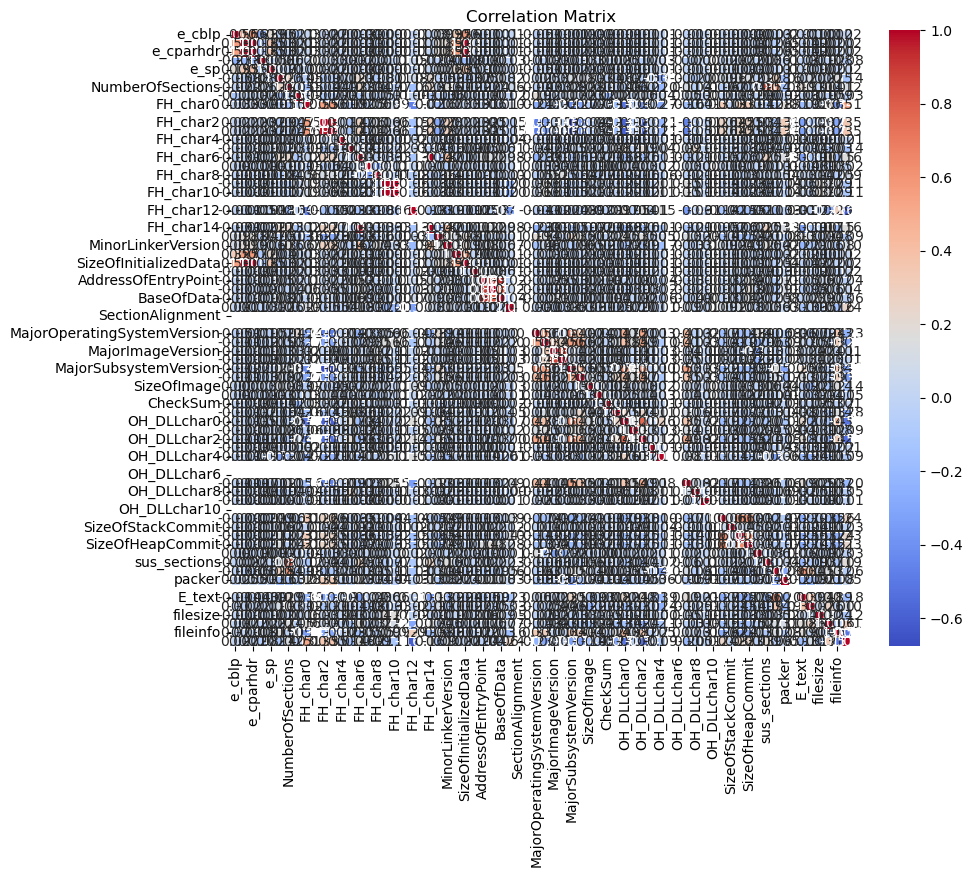

In [13]:
# Create a heatmap of the correlation matrix

corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5205   NaN
5206   NaN
5207   NaN
5208   NaN
5209   NaN
Name: packer_type, Length: 5210, dtype: float64
Target looks like classification


C:\Users\O M A R\anaconda3\Lib\site-packages\dabl\plot\utils.py:711: UserWarning: Dropped 24 outliers in column MinorOperatingSystemVersion.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\O M A R\anaconda3\Lib\site-packages\dabl\plot\utils.py:711: UserWarning: Dropped 14 outliers in column sus_sections.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\O M A R\anaconda3\Lib\site-packages\dabl\plot\utils.py:711: UserWarning: Dropped 4 outliers in column NumberOfSections.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\O M A R\anaconda3\Lib\site-packages\dabl\plot\utils.py:711: UserWarning: Dropped 33 outliers in column filesize.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\O M A R\anaconda3\Lib\site-packages\dabl\plot\utils.py:711: UserWarning: Dropped 7 outliers in column MinorLinkerVersion.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\O M A R\anaconda3\Lib\site-packages\dabl\plot\utils.py:711: UserWarning: Dropped 15 out

Linear Discriminant Analysis training set score: 0.754
Showing only top 10 of 25 categorical features


C:\Users\O M A R\anaconda3\Lib\site-packages\dabl\plot\utils.py:614: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in data.groupby(target)[column]:


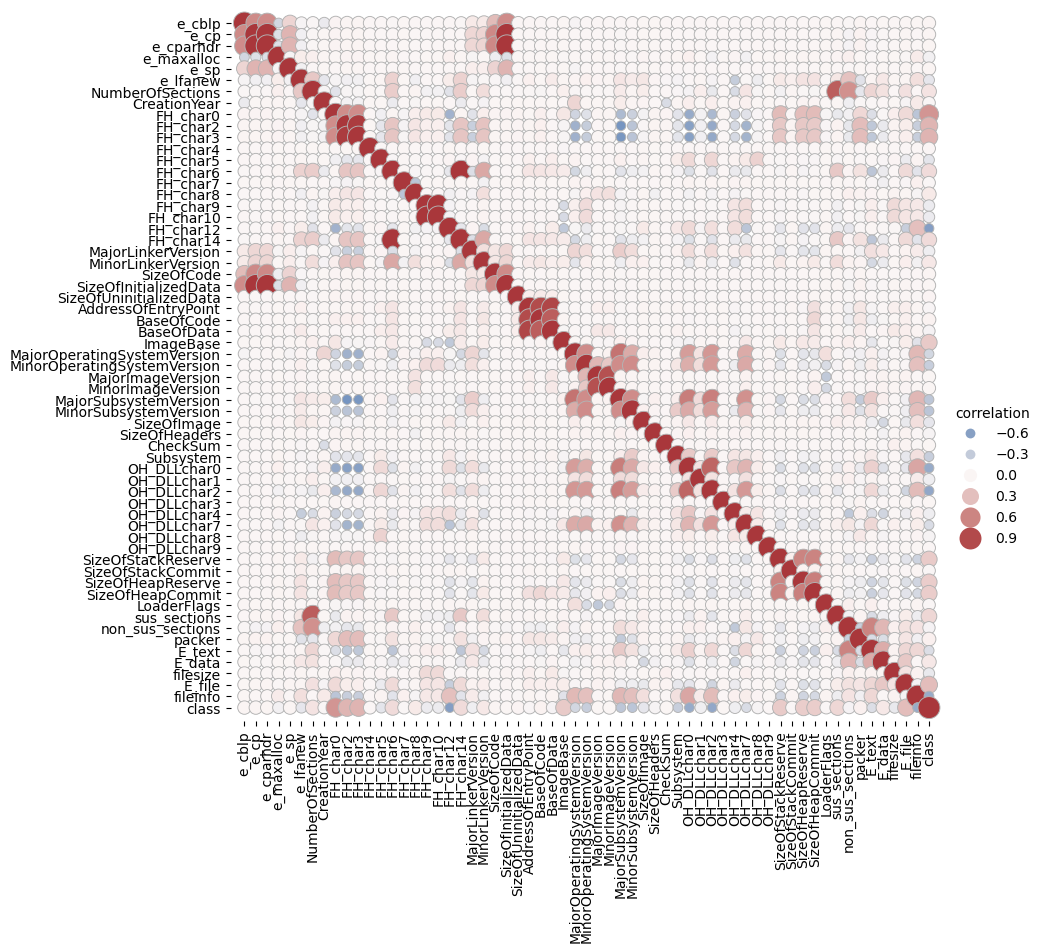

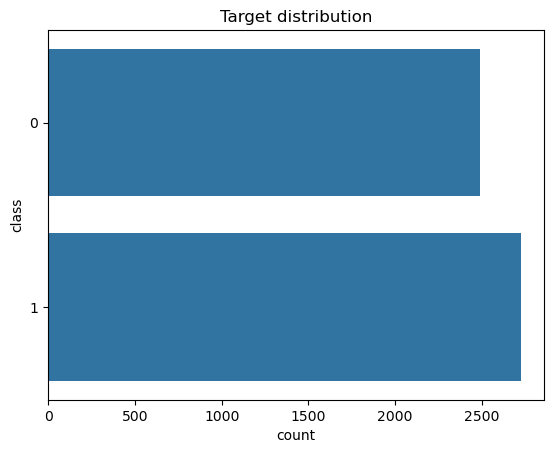

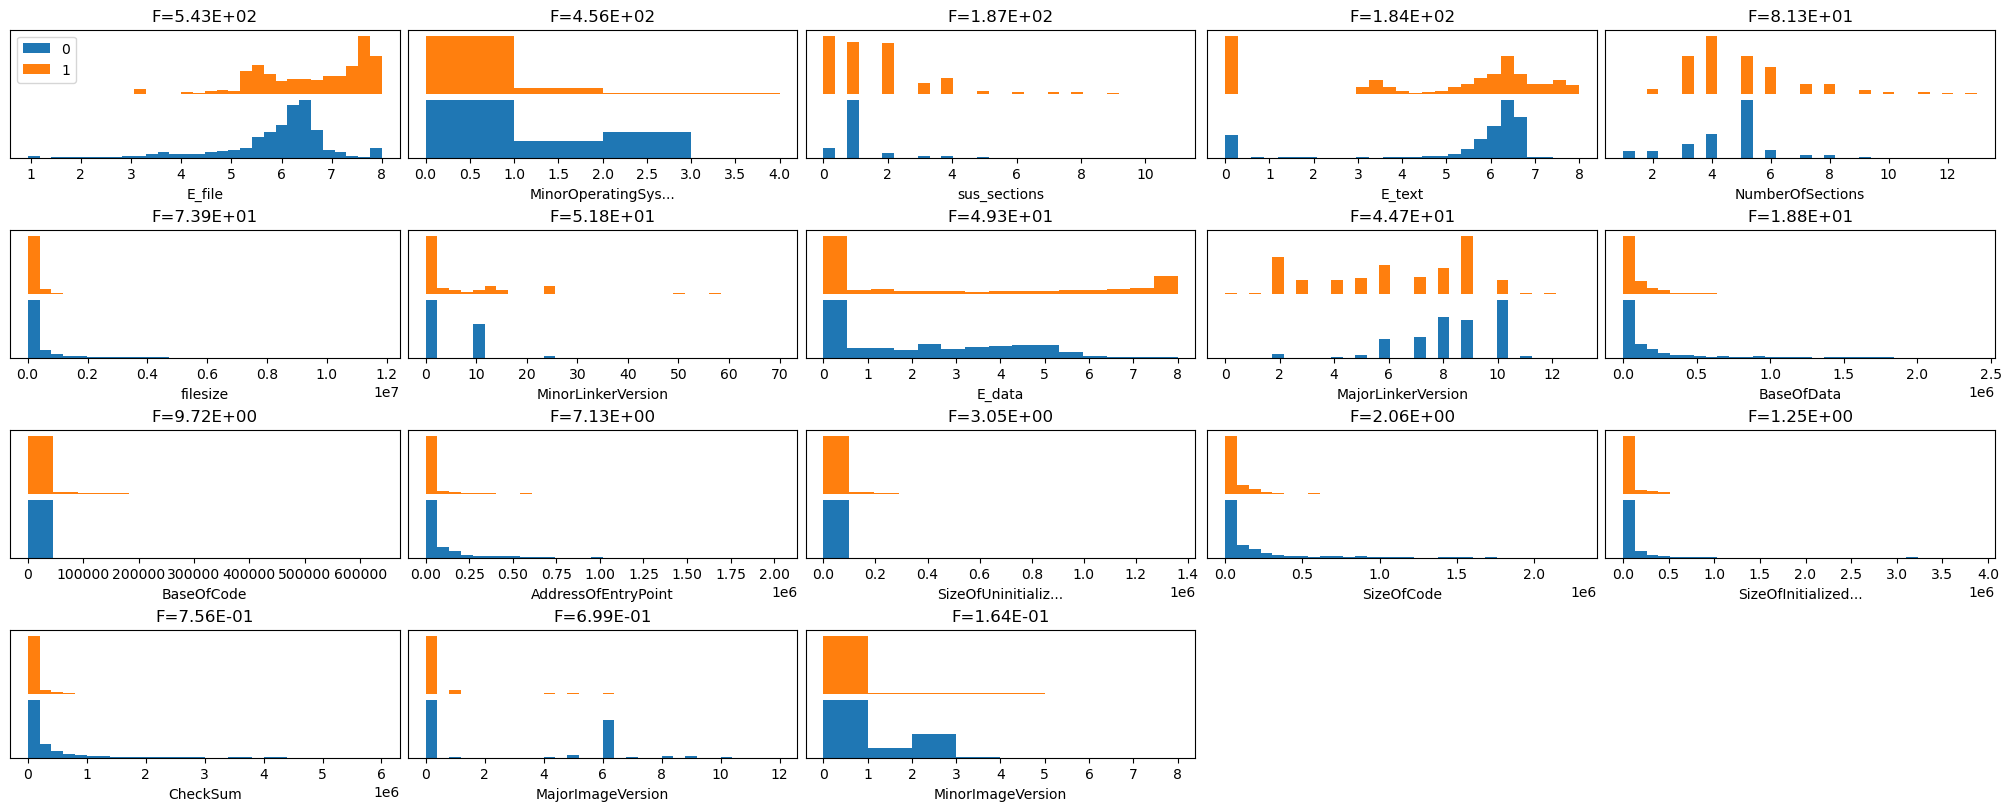

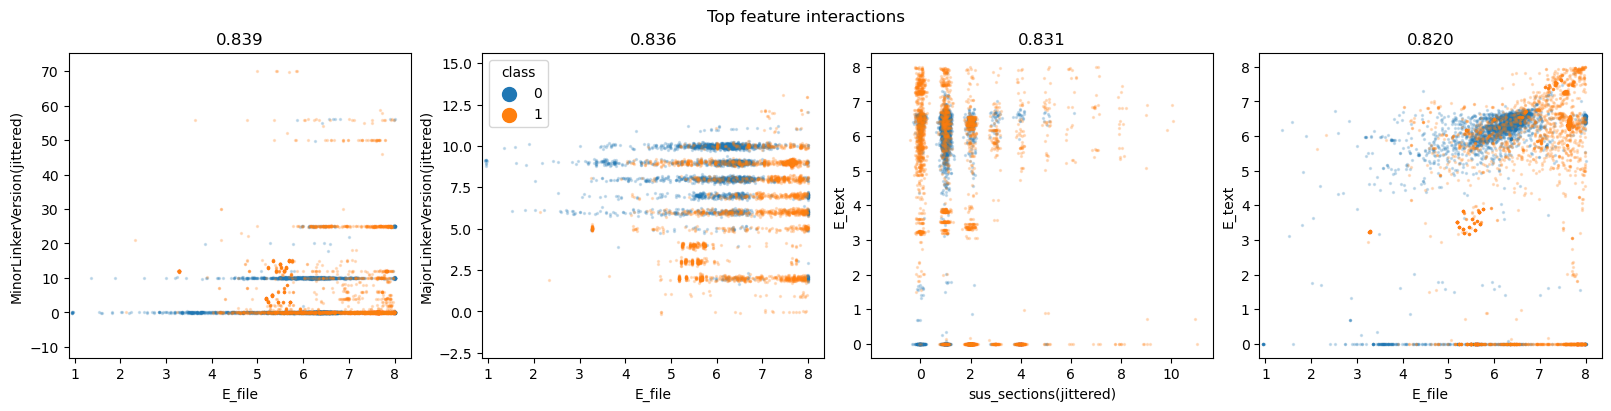

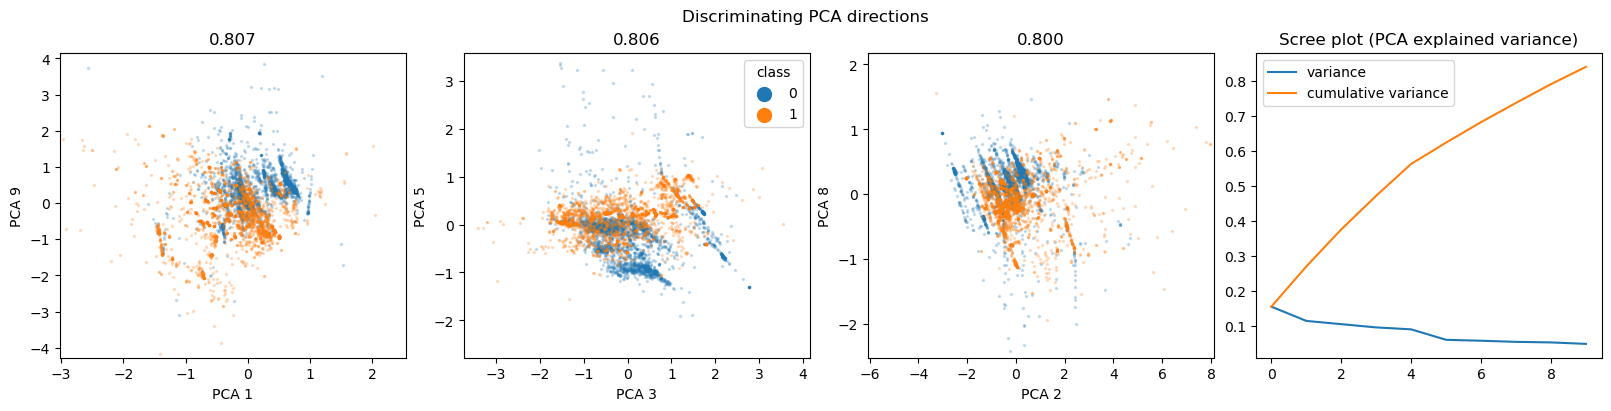

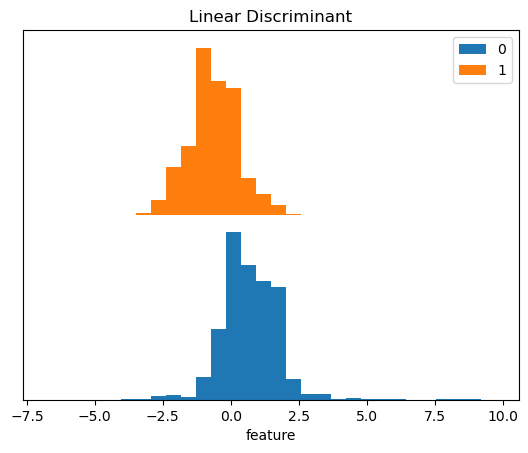

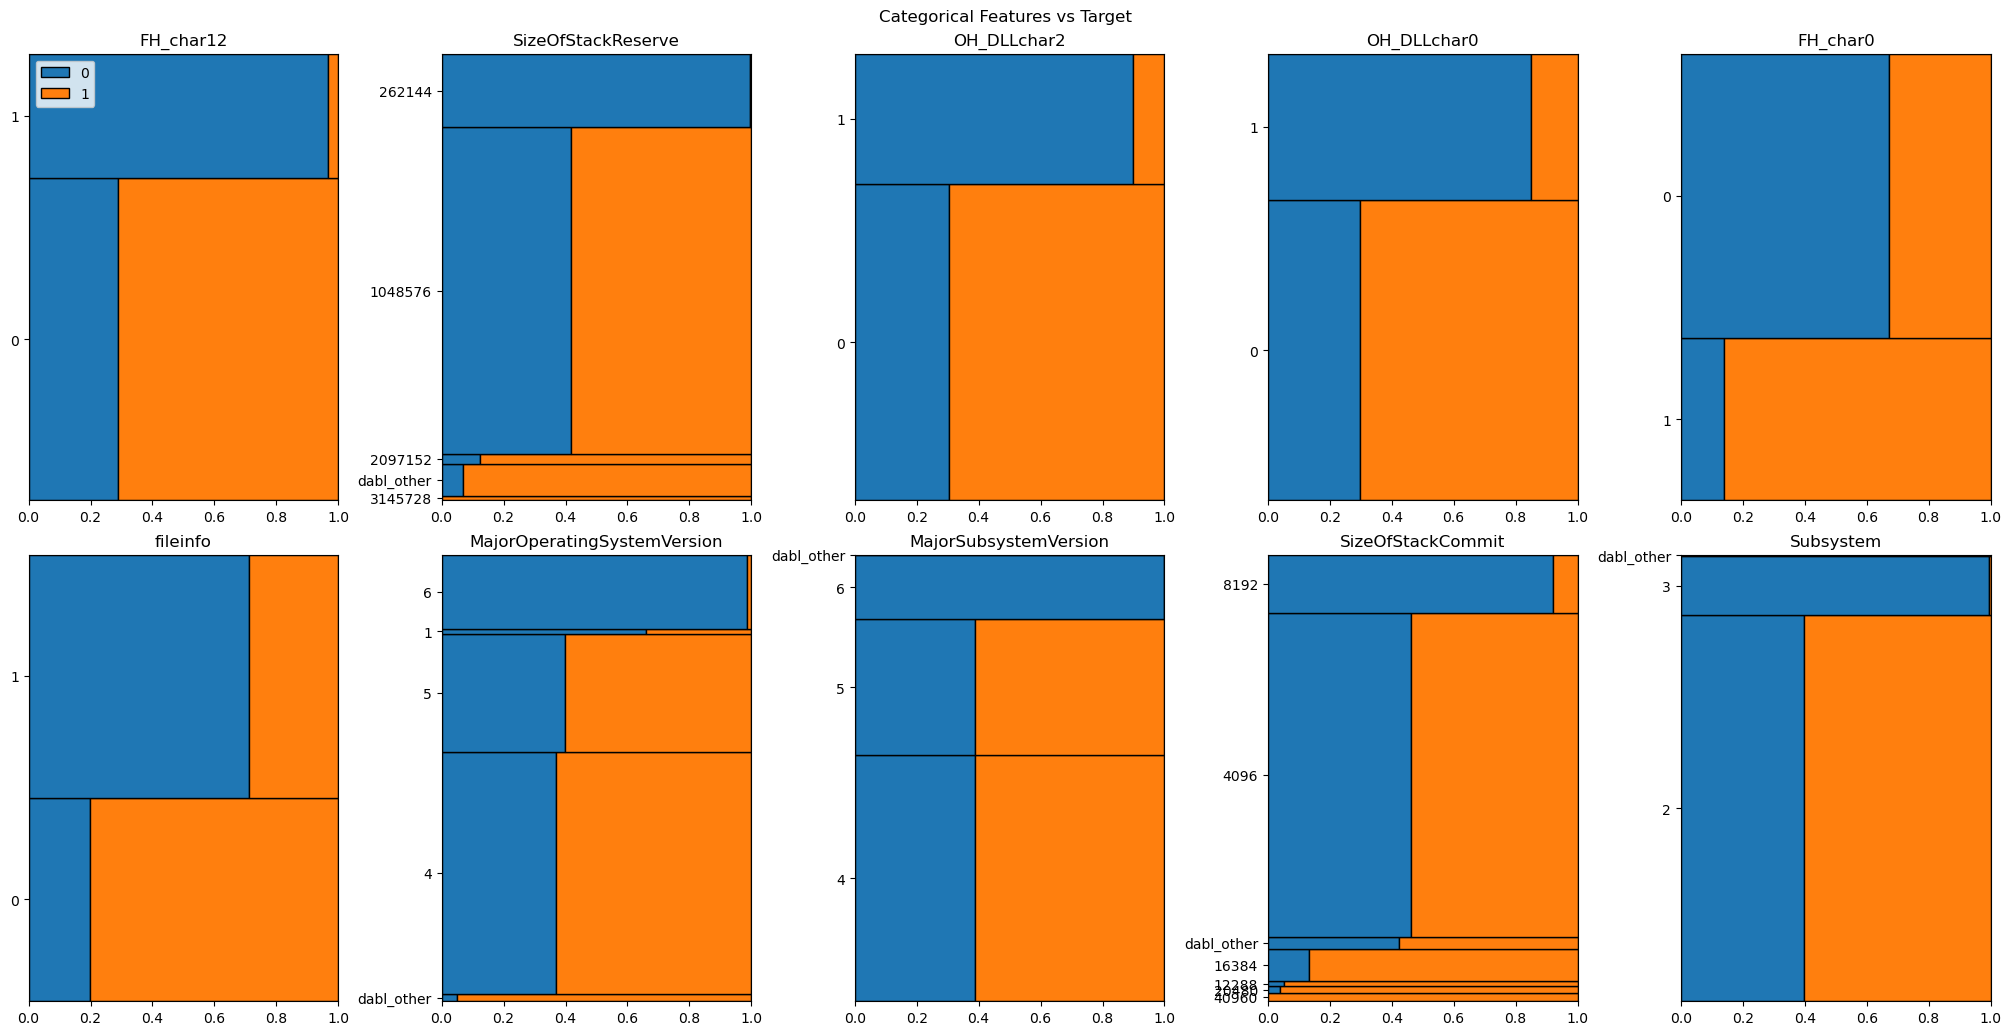

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # Correct import for Patch
import dabl

# Exploratory Data Analysis (EDA)
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr().stack().reset_index(name="correlation")

# Create the correlation plot
g = sns.relplot(
    data=corr,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8)
)

g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)

for label in g.ax.get_xticklabels():
    label.set_rotation(90)

# Modify the legend appearance by targeting the correct object
# Accessing the legend elements correctly
for handle in g.legend.get_children():
    if isinstance(handle, plt.Line2D):  # If the legend handle is a line
        handle.set_color('gray')  # Set color for lines
    elif isinstance(handle, mpatches.Patch):  # If the legend handle is a patch
        handle.set_facecolor('.7')  # Set facecolor for patches

# Display the plot
print(df['packer_type'])
dabl.plot(df, target_col='class')
plt.show()


Class Distribution:
class
1    2722
0    2488
Name: count, dtype: int64


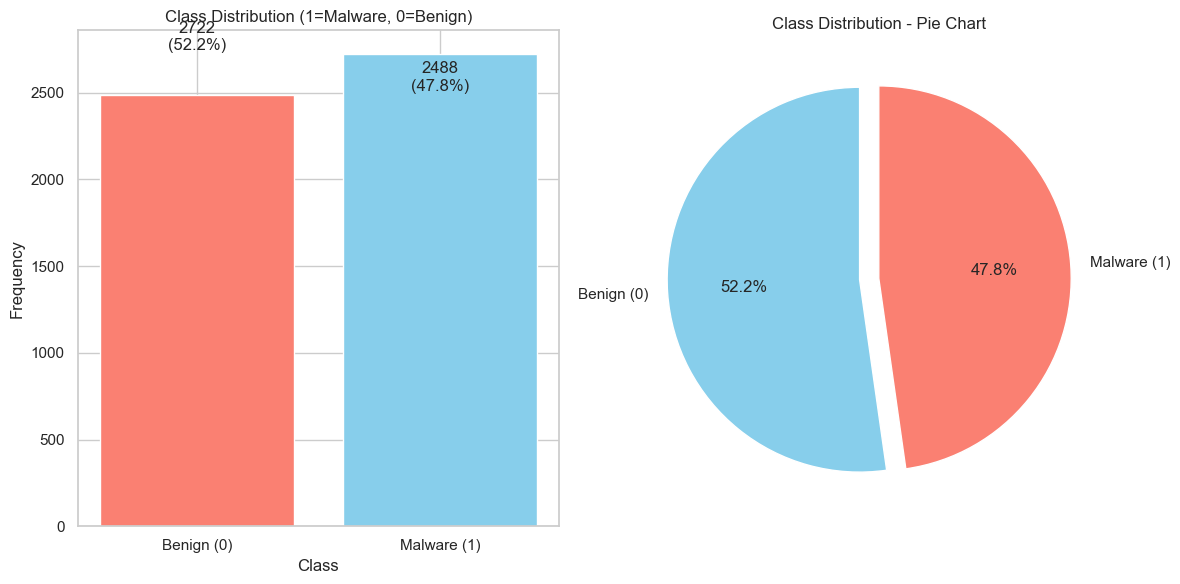

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Class distribution
class_distribution = df['class'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Plot the class distribution as a bar chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create two subplots (1 row, 2 columns)

# Bar plot
axes[0].bar(class_distribution.index, class_distribution.values, color=['skyblue', 'salmon'])
axes[0].set_title('Class Distribution (1=Malware, 0=Benign)')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Benign (0)', 'Malware (1)'], rotation=0)

# Add annotations to the bar chart
for i, count in enumerate(class_distribution):
    percentage = (count / class_distribution.sum()) * 100
    axes[0].text(i, count + 5, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=12)

# Pie chart for class distribution
axes[1].pie(class_distribution.values, labels=['Benign (0)', 'Malware (1)'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, explode=(0.1, 0))
axes[1].set_title('Class Distribution - Pie Chart')

# Show the plot
plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()


In [19]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Example dataset (replace with your actual dataset)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train)
X_test_scaled = imputer.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)  # Apply scaling after imputation
X_test_scaled = scaler.transform(X_test_scaled)

# Feature Selection: Recursive Feature Elimination
model = LogisticRegression(max_iter=1000)  # Set max_iter to ensure convergence if needed
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Check selected features
print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)

# Fit the model with the selected features
model.fit(X_train_rfe, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_rfe)

# Evaluate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Selected Features: [False False False False False False False False False False  True False
 False False False False False False False False  True  True False  True
 False False False  True False False]
Feature Ranking: [ 9 15 13  7 25 12 14  2 19 24  1 21 11  4 18  6 22 20 16 17  1  1  3  1
  8 26  5  1 10 23]
Model Accuracy: 97.37%


Selected Features: [False False False False False False False False False False  True False
 False False False False False False False False  True  True False  True
 False False False  True False False]
Feature Ranking: [ 9 15 13  7 25 12 14  2 19 24  1 21 11  4 18  6 22 20 16 17  1  1  3  1
  8 26  5  1 10 23]
Model Accuracy: 97.37%
Precision: 0.97
Recall: 0.99
F1 Score: 0.98
ROC-AUC: 0.97
Cross-validation scores: [0.96703297 0.94505495 1.         0.97802198 0.93406593]
Mean CV score: 0.96
Best Hyperparameters from GridSearchCV: {'C': 0.1, 'solver': 'liblinear'}
Best Model Accuracy: 97.37%
Confusion Matrix:
[[41  2]
 [ 1 70]]


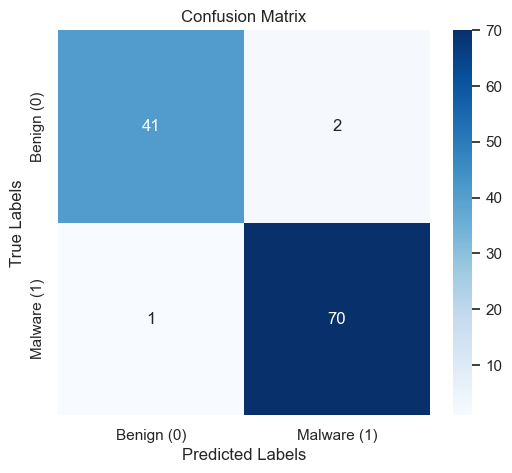

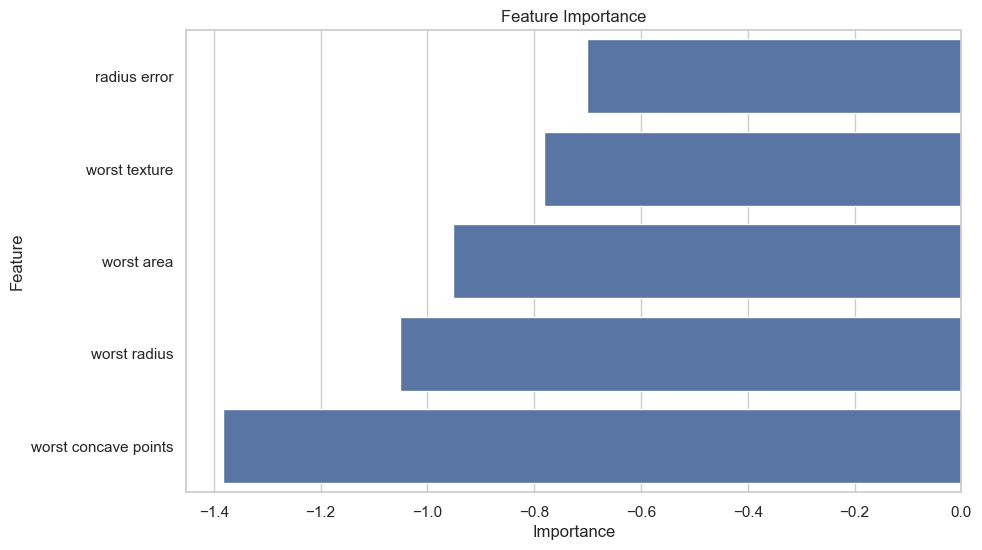

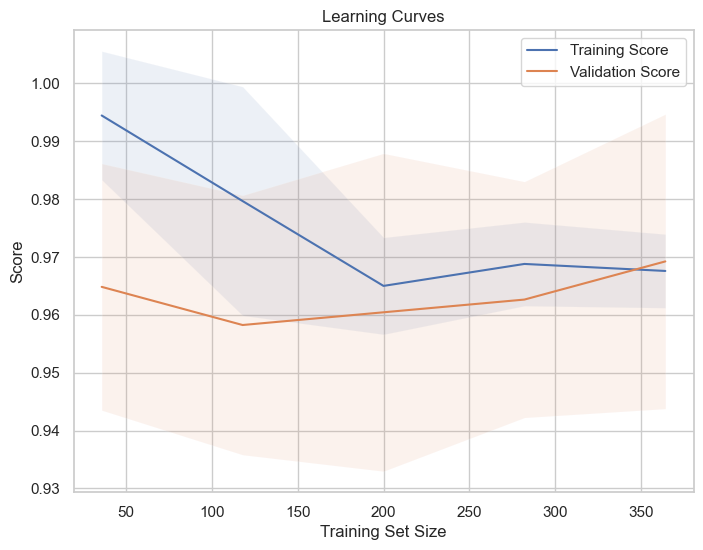

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dataset (replace with your actual dataset)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train)
X_test_scaled = imputer.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)  # Apply scaling after imputation
X_test_scaled = scaler.transform(X_test_scaled)

# Feature Selection: Recursive Feature Elimination
model = LogisticRegression(max_iter=1000)  # Set max_iter to ensure convergence if needed
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Check selected features
print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)

# Fit the model with the selected features
model.fit(X_train_rfe, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_rfe)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Additional Evaluation Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Cross-Validation Score
cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solver types
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_rfe, y_train)
print(f"Best Hyperparameters from GridSearchCV: {grid_search.best_params_}")

# Fit the best model from GridSearchCV
best_model = grid_search.best_estimator_
best_model.fit(X_train_rfe, y_train)
y_pred_best = best_model.predict(X_test_rfe)

# Re-evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
print(f"Confusion Matrix:\n{conf_matrix}")

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malware (1)'], yticklabels=['Benign (0)', 'Malware (1)'])
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Feature Importance Plot (using coefficients from Logistic Regression)
feature_importance = best_model.coef_[0]
features = X.columns[rfe.support_]
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Learning Curves (Training and Validation error)
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_rfe, y_train, cv=5)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation Score")
plt.fill_between(train_sizes, train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1)
plt.fill_between(train_sizes, test_scores.mean(axis=1) - test_scores.std(axis=1),
                 test_scores.mean(axis=1) + test_scores.std(axis=1), alpha=0.1)
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()


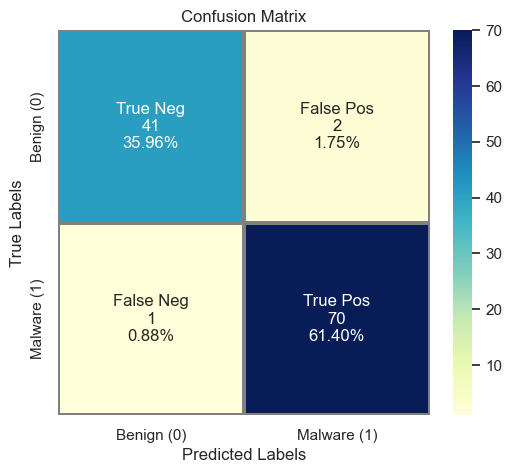

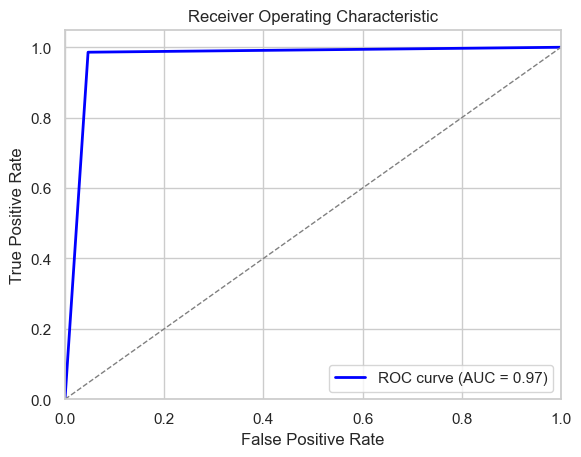

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Assuming you already have y_test, y_pred (predictions) from your model
# Example confusion matrix (replace this with your actual confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

# Formatting the labels with group names, counts, and percentages
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Plot Confusion Matrix with customized colormap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='YlGnBu', cbar=True, 
            xticklabels=['Benign (0)', 'Malware (1)'], 
            yticklabels=['Benign (0)', 'Malware (1)'], 
            annot_kws={"size": 12}, linewidths=1.5, linecolor='gray')

plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# ROC Curve (Polynomial Kernel or Logistic Regression in your case)
fpr_poly, tpr_poly, poly_thresholds = roc_curve(y_test, y_pred)
roc_auc_poly = auc(fpr_poly, tpr_poly)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr_poly, tpr_poly, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_poly)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


SVC score after StdScaler: 0.983
SVC's best score on cross-validation: 0.981
Classifier's best parameters: {'svm__C': 100, 'svm__gamma': 0.005}
              precision    recall  f1-score   support

      benign      0.982     0.982     0.982       610
   malicious      0.984     0.984     0.984       693

    accuracy                          0.983      1303
   macro avg      0.983     0.983     0.983      1303
weighted avg      0.983     0.983     0.983      1303



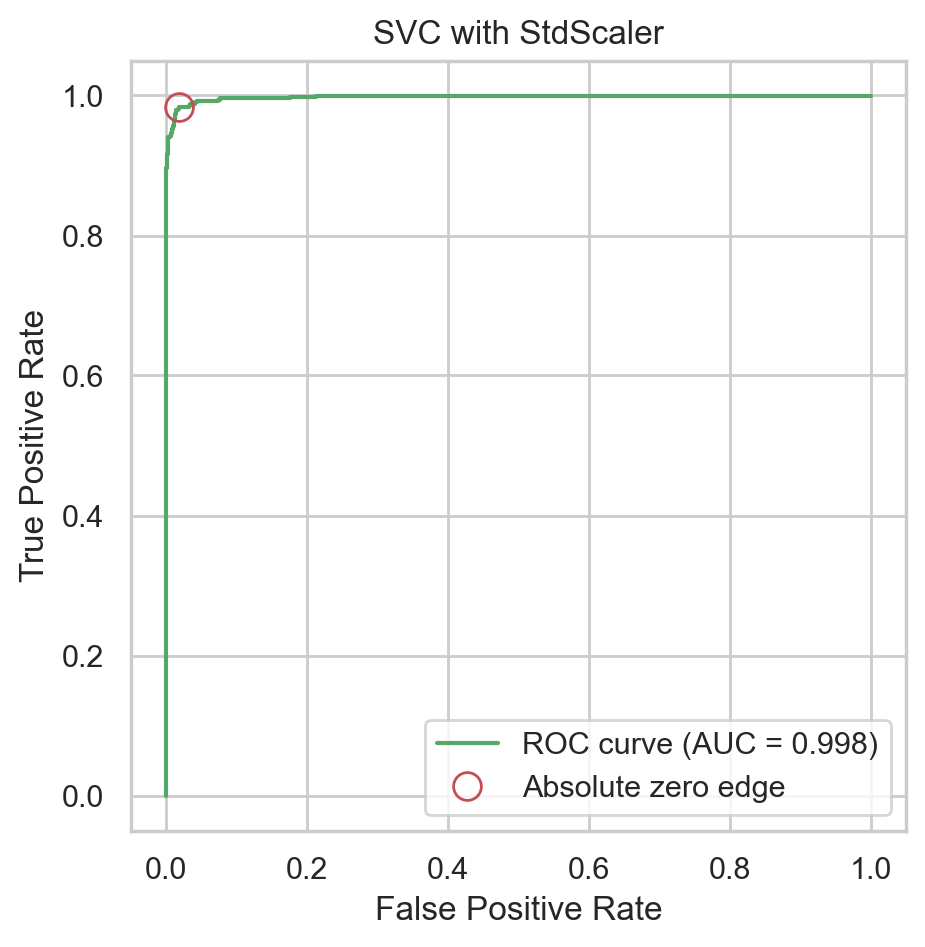

In [71]:
# Check if 'packer_type' exists in the DataFrame
if 'packer_type' in df.columns:
    # Create a mapping of unique packer types to integers
    pt = df['packer_type'].unique()
    p_types = {pt[i]: i for i in range(len(pt))}
    
    # Map packer_type to numeric values
    df['pt_num'] = df['packer_type'].map(p_types)

    # Pop the target column and packer_type
    cl = df.pop('class')
    df.drop(columns='packer_type', inplace=True)  # Drop the original column

    # Proceed with the train-test split
    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report, roc_curve, roc_auc_score
    import matplotlib.pyplot as plt

    x_train, x_test, y_train, y_test = train_test_split(df, cl, random_state=0)

    # Pipeline made to scale & classify data
    pipeStd = Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state=0))])
    pipeStd.fit(x_train, y_train)

    # Best parameters found SVM Classifier and cross-validated
    param_grid = {'svm__C': [0.1, 1, 10, 100, 200, 300], 'svm__gamma': [0.001, 0.005, 0.01, 0.1, 1]}
    grid = GridSearchCV(pipeStd, param_grid, cv=5, n_jobs=-1)
    grid.fit(x_train.to_numpy(), y_train)

    # Some core classification metrics
    print('SVC score after StdScaler: {:.3f}'.format(grid.score(x_test.to_numpy(), y_test)))
    print("SVC's best score on cross-validation: {:.3f}".format(grid.best_score_))
    print("Classifier's best parameters: {}".format(grid.best_params_))
    
    pred_val = grid.predict(x_test.to_numpy())
    print(classification_report(y_test, pred_val, target_names=['benign', 'malicious'], digits=3))

    # ROC-AUC score with plot
    fpr, tpr, thresholds = roc_curve(
        y_test, grid.best_estimator_['svm'].decision_function(
            grid.best_estimator_['scaler'].transform(x_test.to_numpy()))
    )
    auc = roc_auc_score(y_test, grid.best_estimator_['svm'].decision_function(
        grid.best_estimator_['scaler'].transform(x_test.to_numpy()))
    )
    close_zero = np.argmin(np.abs(thresholds))

    plt.figure(figsize=(5, 5), dpi=200)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.3f})'.format(auc), color='g')
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="Absolute zero edge", fillstyle='none', color='r')
    plt.legend(loc='lower right')
    plt.title('SVC with StdScaler')
    plt.show()
else:
    print("'packer_type' column not found in the DataFrame. Please check your data.")

In [83]:
#### MACHINE LEARNING ALGORITHM  ###

K-Nearest Neighbors (KNN) Results
1. ROC AUC: 0.533
2. Accuracy : 0.5333333333333333
3. Classification Report -
               precision    recall  f1-score   support

           0       0.53      0.53      0.53        15
           1       0.53      0.53      0.53        15

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.53        30
weighted avg       0.53      0.53      0.53        30

4. Confusion Matrix - 
 [[8 7]
 [7 8]]
5. F1 Score: 0.533


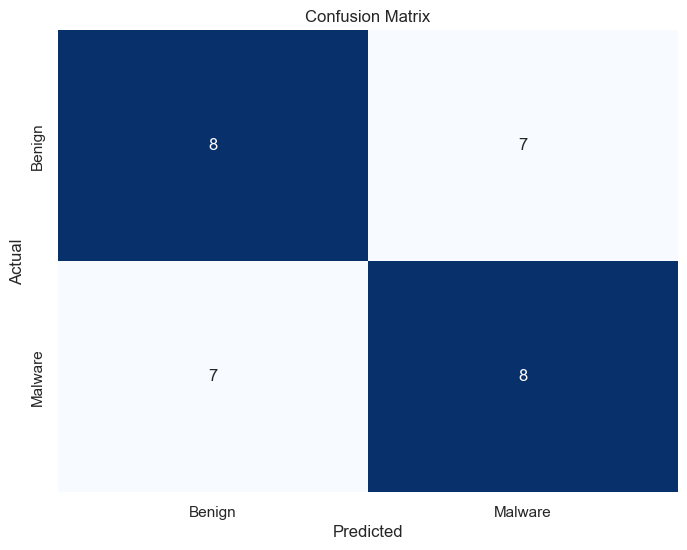

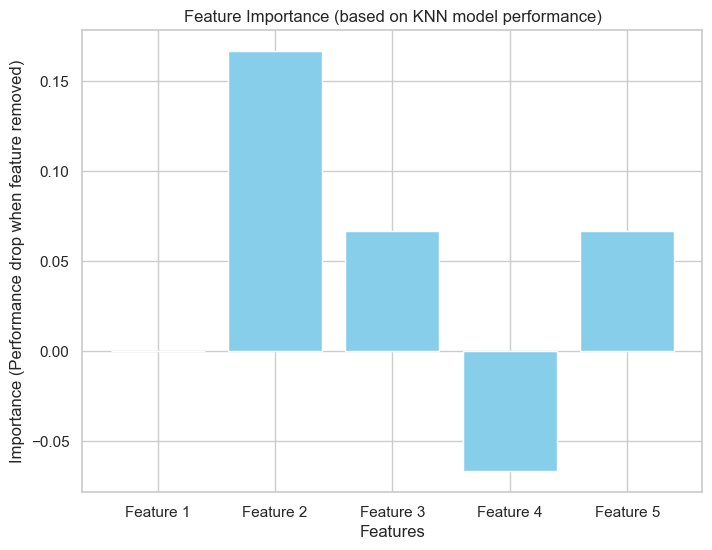

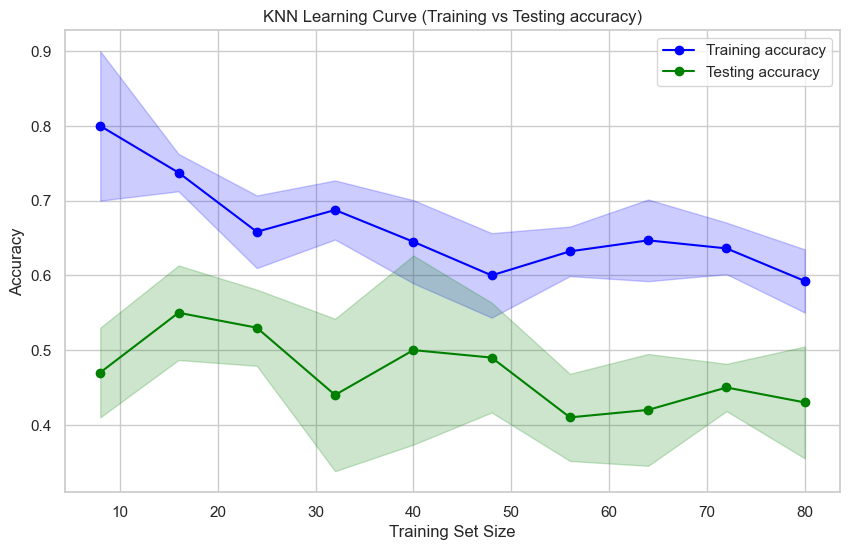

In [98]:
## K-Nearest Neighbors (KNN) classifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns

# Dummy data for illustration
X_arr = np.random.rand(100, 5)  # 100 samples, 5 features
y_arr = np.random.randint(0, 2, 100)  # 100 target labels (binary classification)

# Split the data into train and test sets
X_train, X_test_arr, y_train, y_test_arr = train_test_split(X_arr, y_arr, test_size=0.3, random_state=42)

# Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)  # Train the model

# Make predictions
sklearn_preds = knn.predict(X_test_arr)

# Calculate various metrics
roc_auc = roc_auc_score(y_test_arr, sklearn_preds)
accuracy = accuracy_score(y_test_arr, sklearn_preds)
classification_rep = classification_report(y_test_arr, sklearn_preds)
conf_matrix = confusion_matrix(y_test_arr, sklearn_preds)
f1 = f1_score(y_test_arr, sklearn_preds)

# Print the results
print("K-Nearest Neighbors (KNN) Results")
print("="*40)
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy :', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)
print("="*40)

# 1) Plot the Confusion Matrix (with Seaborn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False, 
            xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2) Plot Feature Importances (by removing each feature and evaluating accuracy)
feature_importances = []

# Calculate the model accuracy for each feature individually by removing one feature at a time
for i in range(X_arr.shape[1]):
    X_temp = np.delete(X_arr, i, axis=1)  # Remove the feature i
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_arr, test_size=0.3, random_state=42)
    knn.fit(X_train_temp, y_train_temp)
    pred = knn.predict(X_test_temp)
    accuracy_without_feature = accuracy_score(y_test_temp, pred)
    feature_importances.append(accuracy_without_feature)

# Feature importance is the difference in accuracy with and without each feature
original_accuracy = accuracy  # Accuracy with all features
feature_importance_scores = [original_accuracy - acc for acc in feature_importances]

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(range(X_arr.shape[1]), feature_importance_scores, tick_label=[f'Feature {i+1}' for i in range(X_arr.shape[1])], color='skyblue')
plt.title("Feature Importance (based on KNN model performance)")
plt.xlabel("Features")
plt.ylabel("Importance (Performance drop when feature removed)")
plt.show()

# 3) Plot Learning Curve (Training vs Testing accuracy)
train_sizes, train_scores, test_scores = learning_curve(knn, X_arr, y_arr, cv=5, scoring='accuracy',
                                                         train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Testing accuracy', color='green', marker='o')

# Fill between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('KNN Learning Curve (Training vs Testing accuracy)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()




C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



Random Forest Classifier Results

1. ROC AUC Score: 0.993

2. Accuracy: 0.993

3. Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       821
           1       0.99      0.99      0.99       899

    accuracy                           0.99      1720
   macro avg       0.99      0.99      0.99      1720
weighted avg       0.99      0.99      0.99      1720


4. Confusion Matrix:
 [[814   7]
 [  5 894]]

5. F1 Score: 0.993

Top 10 most important features:
FH_char12: 0.153
CheckSum: 0.073
E_file: 0.064
fileinfo: 0.061
filesize: 0.049
FH_char0: 0.048
OH_DLLchar2: 0.047
OH_DLLchar0: 0.046
AddressOfEntryPoint: 0.035
Subsystem: 0.033


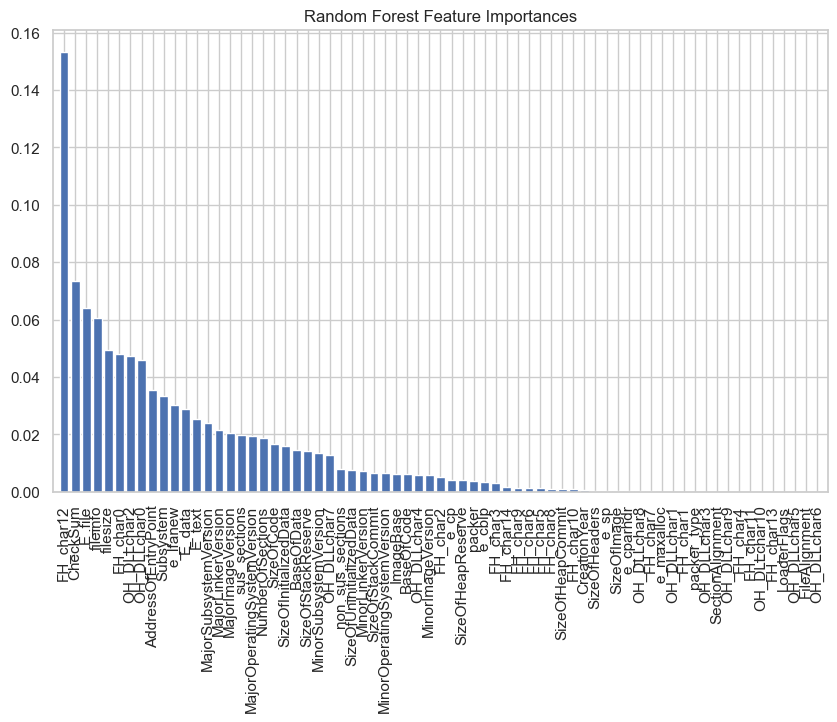

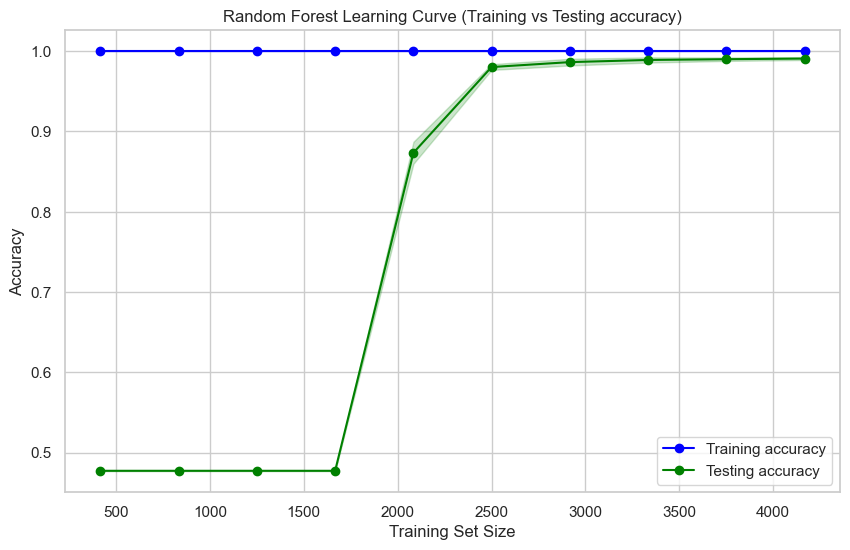

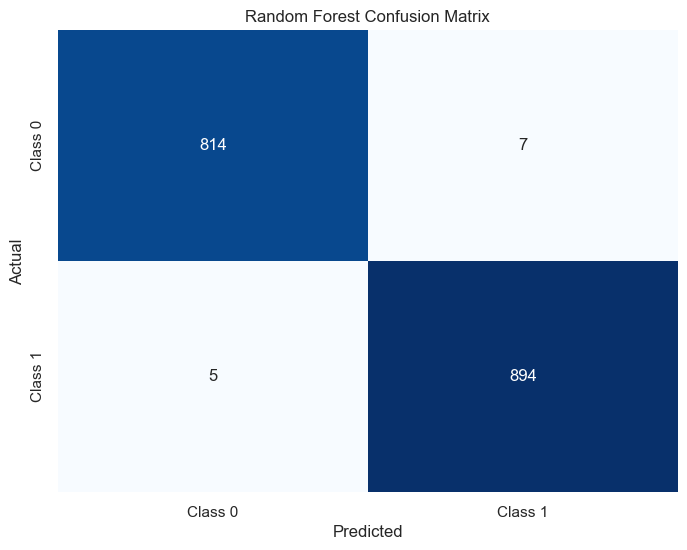

In [100]:
## Random Forest(RF) Classifier with default hyperparameters

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'class' is the target column

# 1. Convert categorical columns to numeric using Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# 2. Define X (features) and y (target)
X = df.drop('class', axis=1)  # Drop the target column 'class'
y = df['class']  # Target column 'class'

# 3. Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Apply standard scaling to the features

# 4. Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=100)

# 5. Initialize and train the Random Forest model
rf_clf = RandomForestClassifier(random_state=100, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# 6. Making predictions and calculating probabilities
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)  # If you need probability estimates

# 7. Calculate various metrics
roc_auc = roc_auc_score(y_test, rf_pred)
accuracy = accuracy_score(y_test, rf_pred)
classification_rep = classification_report(y_test, rf_pred)
conf_matrix = confusion_matrix(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)

# 8. Print the results with titles
print("\nRandom Forest Classifier Results")
print("=================================")

# 8.1 Print ROC AUC score with title
print(f"\n1. ROC AUC Score: {roc_auc:.3f}")

# 8.2 Print Accuracy score with title
print(f"\n2. Accuracy: {accuracy:.3f}")

# 8.3 Print Classification Report with title
print(f"\n3. Classification Report:\n", classification_rep)

# 8.4 Print Confusion Matrix with title
print(f"\n4. Confusion Matrix:\n", conf_matrix)

# 8.5 Print F1 Score with title
print(f"\n5. F1 Score: {f1:.3f}")

# 9. Feature Importance (Optional, if you want to see which features the RF model finds most important)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the top 10 most important features
print("\nTop 10 most important features:")
for f in range(10):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]:.3f}")

# 10. Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# 11. Plot Learning Curve (Training vs Testing accuracy)
train_sizes, train_scores, test_scores = learning_curve(rf_clf, X_scaled, y, cv=5, scoring='accuracy', 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Testing accuracy', color='green', marker='o')

# Fill between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Random Forest Learning Curve (Training vs Testing accuracy)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 12. Plot Confusion Matrix (with Seaborn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False, 
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['packer_type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



Naive Bayes Classifier Results

1. ROC AUC Score: 0.712

2. Accuracy: 0.699

3. Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.98      0.76       821
           1       0.96      0.44      0.61       899

    accuracy                           0.70      1720
   macro avg       0.79      0.71      0.68      1720
weighted avg       0.79      0.70      0.68      1720


4. Confusion Matrix:
 [[803  18]
 [499 400]]

5. F1 Score: 0.607


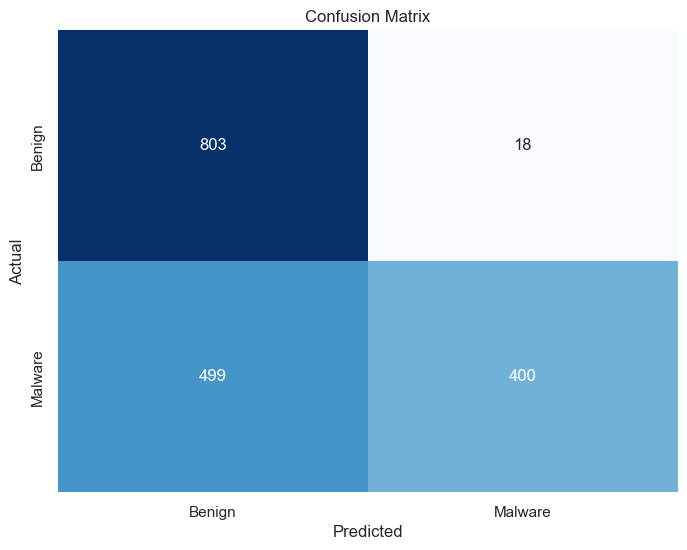

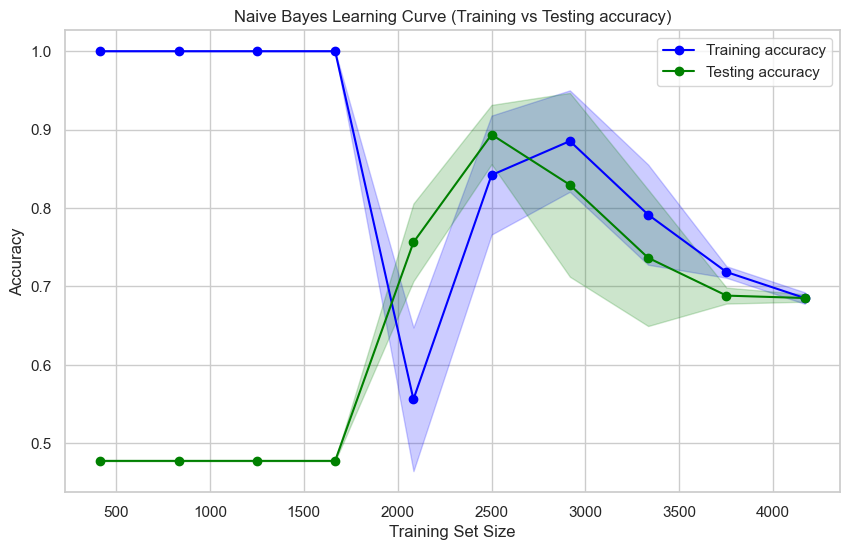

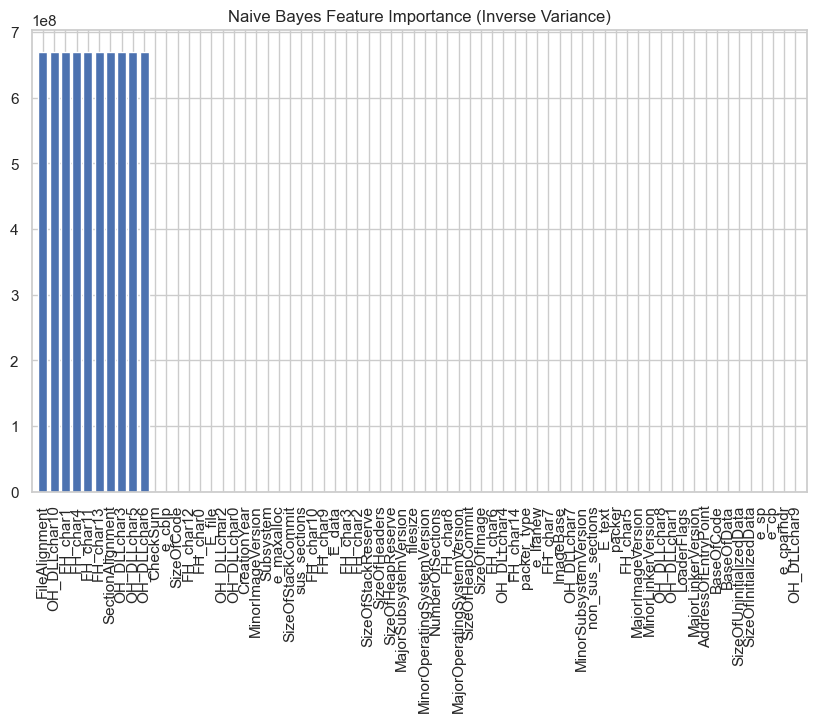

In [114]:
## Naive Bayes CLassifier (NB)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame and 'class' is the target column

# 1. Convert categorical columns to numeric using Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# 2. Define X (features) and y (target)
X = df.drop('class', axis=1)  # Drop the target column 'class'
y = df['class']  # Target column 'class'

# 3. Handle missing values (Impute using the mean strategy)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Apply imputation

# 4. Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)  # Apply standard scaling to the features

# 5. Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=100)

# 6. Initialize and train the Naive Bayes model
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# 7. Making predictions
nb_pred = nb_clf.predict(X_test)

# 8. Calculate various metrics
roc_auc = roc_auc_score(y_test, nb_pred)
accuracy = accuracy_score(y_test, nb_pred)
classification_rep = classification_report(y_test, nb_pred)
conf_matrix = confusion_matrix(y_test, nb_pred)
f1 = f1_score(y_test, nb_pred)

# 9. Print the results with titles
print("\nNaive Bayes Classifier Results")
print("=================================")

# 9.1 Print ROC AUC score with title
print(f"\n1. ROC AUC Score: {roc_auc:.3f}")

# 9.2 Print Accuracy score with title
print(f"\n2. Accuracy: {accuracy:.3f}")

# 9.3 Print Classification Report with title
print(f"\n3. Classification Report:\n", classification_rep)

# 9.4 Print Confusion Matrix with title
print(f"\n4. Confusion Matrix:\n", conf_matrix)

# 9.5 Print F1 Score with title
print(f"\n5. F1 Score: {f1:.3f}")

# 10. Plot Confusion Matrix (Optional)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False, 
            xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 11. Plot Learning Curve (Training vs Testing accuracy)
train_sizes, train_scores, test_scores = learning_curve(nb_clf, X_scaled, y, cv=5, scoring='accuracy', 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Testing accuracy', color='green', marker='o')

# Fill between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Naive Bayes Learning Curve (Training vs Testing accuracy)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 12. Feature Importance (using inverse of variance)
# For GaussianNB, the feature variances are stored in `var_`
feature_variances = nb_clf.var_  # Variances for each feature
feature_importances = 1 / np.mean(feature_variances, axis=0)  # Inverse of the variance = feature importance

# Get feature names
feature_names = X.columns

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# 13. Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.title("Naive Bayes Feature Importance (Inverse Variance)")
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=90)
plt.xlim([-1, len(feature_importances)])
plt.show()





C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['packer_type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Classifier Results

1. ROC AUC Score: 0.981

2. Accuracy: 0.981

3. Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       821
           1       0.98      0.99      0.98       899

    accuracy                           0.98      1720
   macro avg       0.98      0.98      0.98      1720
weighted avg       0.98      0.98      0.98      1720


4. Confusion Matrix:
 [[800  21]
 [ 12 887]]

5. F1 Score: 0.982


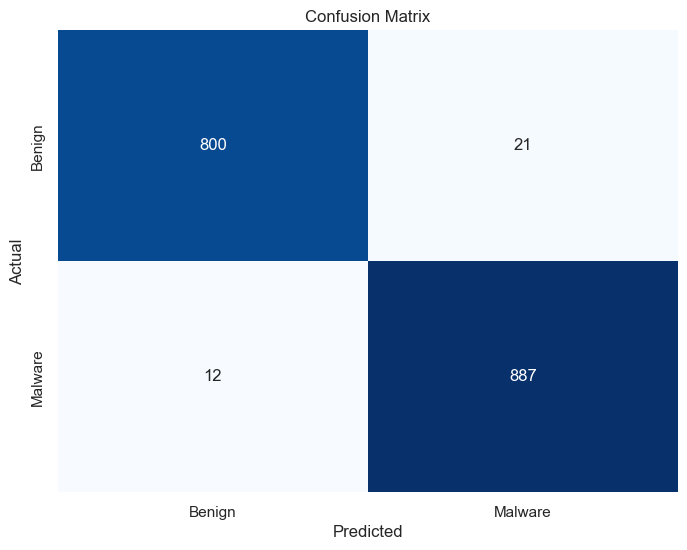

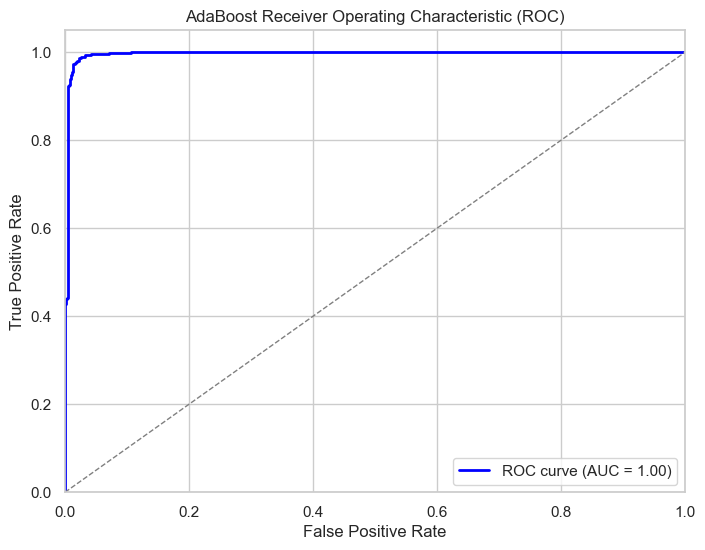

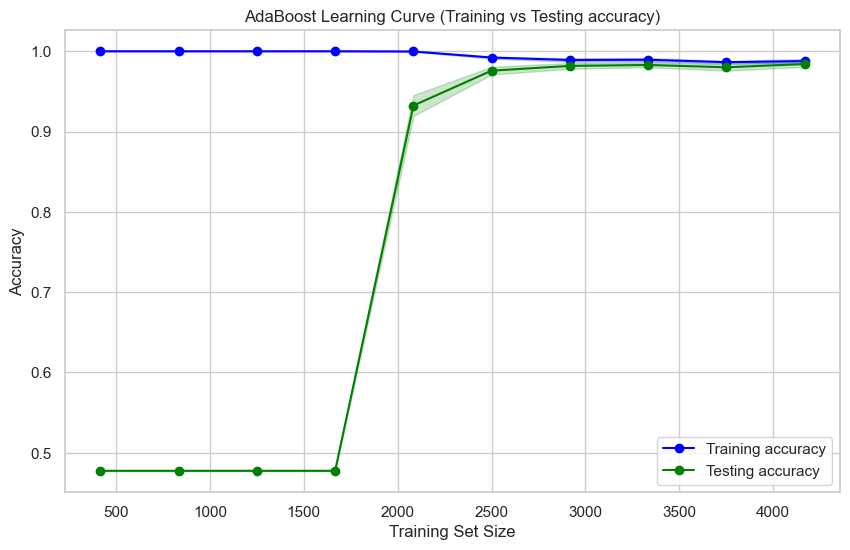

In [126]:
## AdaBoost Model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame and 'class' is the target column

# 1. Convert categorical columns to numeric using Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# 2. Define X (features) and y (target)
X = df.drop('class', axis=1)  # Drop the target column 'class'
y = df['class']  # Target column 'class'

# 3. Handle missing values (Impute using the mean strategy)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Apply imputation to fill missing values

# 4. Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)  # Apply standard scaling to the features

# 5. Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=100)

# 6. Initialize and train the AdaBoost model
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=100)
ada_clf.fit(X_train, y_train)

# 7. Making predictions
ada_pred = ada_clf.predict(X_test)

# 8. Calculate various metrics
roc_auc = roc_auc_score(y_test, ada_pred)
accuracy = accuracy_score(y_test, ada_pred)
classification_rep = classification_report(y_test, ada_pred)
conf_matrix = confusion_matrix(y_test, ada_pred)
f1 = f1_score(y_test, ada_pred)

# 9. Print the results with titles
print("\nAdaBoost Classifier Results")
print("=================================")

# 9.1 Print ROC AUC score with title
print(f"\n1. ROC AUC Score: {roc_auc:.3f}")

# 9.2 Print Accuracy score with title
print(f"\n2. Accuracy: {accuracy:.3f}")

# 9.3 Print Classification Report with title
print(f"\n3. Classification Report:\n", classification_rep)

# 9.4 Print Confusion Matrix with title
print(f"\n4. Confusion Matrix:\n", conf_matrix)

# 9.5 Print F1 Score with title
print(f"\n5. F1 Score: {f1:.3f}")

# 10. Plot Confusion Matrix (Optional)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False, 
            xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 11. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, ada_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# 12. Plot Learning Curve (Training vs Testing accuracy)
train_sizes, train_scores, test_scores = learning_curve(ada_clf, X_scaled, y, cv=5, scoring='accuracy', 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Testing accuracy', color='green', marker='o')

# Fill between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('AdaBoost Learning Curve (Training vs Testing accuracy)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()



Logistic Regression Results

1. ROC AUC Score: 0.954

2. Accuracy: 0.955

3. Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       821
           1       0.95      0.96      0.96       899

    accuracy                           0.95      1720
   macro avg       0.95      0.95      0.95      1720
weighted avg       0.95      0.95      0.95      1720


4. Confusion Matrix:
 [[777  44]
 [ 34 865]]

5. F1 Score: 0.957


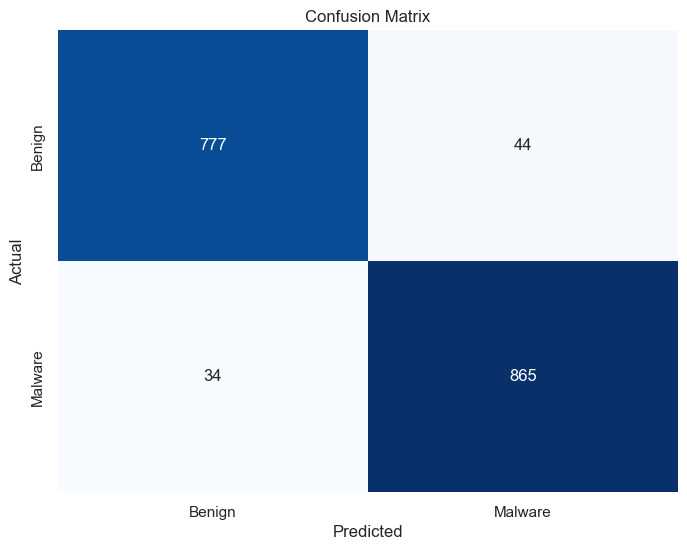

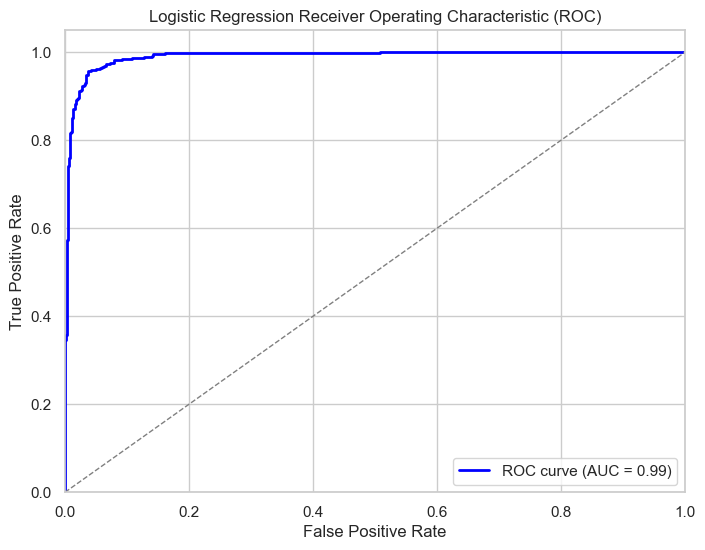

C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1301, in fit
    ra

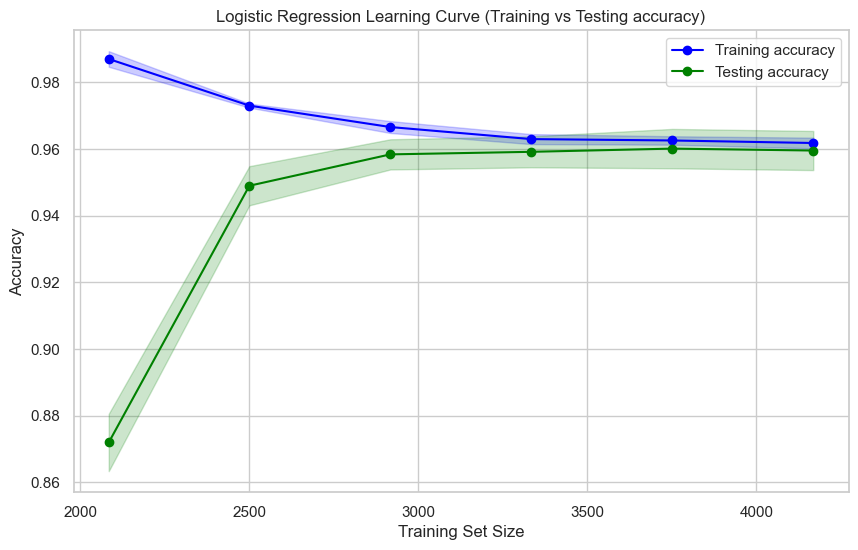

In [128]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression

# 1. Define and train the Logistic Regression model
log_reg = LogisticRegression(random_state=100)
log_reg.fit(X_train, y_train)

# 2. Making predictions
log_reg_pred = log_reg.predict(X_test)

# 3. Calculate various metrics
roc_auc = roc_auc_score(y_test, log_reg_pred)
accuracy = accuracy_score(y_test, log_reg_pred)
classification_rep = classification_report(y_test, log_reg_pred)
conf_matrix = confusion_matrix(y_test, log_reg_pred)
f1 = f1_score(y_test, log_reg_pred)

# 4. Print the results with titles
print("\nLogistic Regression Results")
print("=================================")

# 4.1 Print ROC AUC score with title
print(f"\n1. ROC AUC Score: {roc_auc:.3f}")

# 4.2 Print Accuracy score with title
print(f"\n2. Accuracy: {accuracy:.3f}")

# 4.3 Print Classification Report with title
print(f"\n3. Classification Report:\n", classification_rep)

# 4.4 Print Confusion Matrix with title
print(f"\n4. Confusion Matrix:\n", conf_matrix)

# 4.5 Print F1 Score with title
print(f"\n5. F1 Score: {f1:.3f}")

# 5. Plot Confusion Matrix (Optional)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False, 
            xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 6. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# 7. Plot Learning Curve (Training vs Testing accuracy)
train_sizes, train_scores, test_scores = learning_curve(log_reg, X_scaled, y, cv=5, scoring='accuracy', 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Testing accuracy', color='green', marker='o')

# Fill between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Logistic Regression Learning Curve (Training vs Testing accuracy)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Decision Tree Classifier Results
1. ROC AUC Score: 0.978
2. Accuracy: 0.978
3. Classification Report -
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       821
           1       0.98      0.97      0.98       899

    accuracy                           0.98      1720
   macro avg       0.98      0.98      0.98      1720
weighted avg       0.98      0.98      0.98      1720

4. Confusion Matrix - 
[[806  15]
 [ 23 876]]
5. F1 Score: 0.979


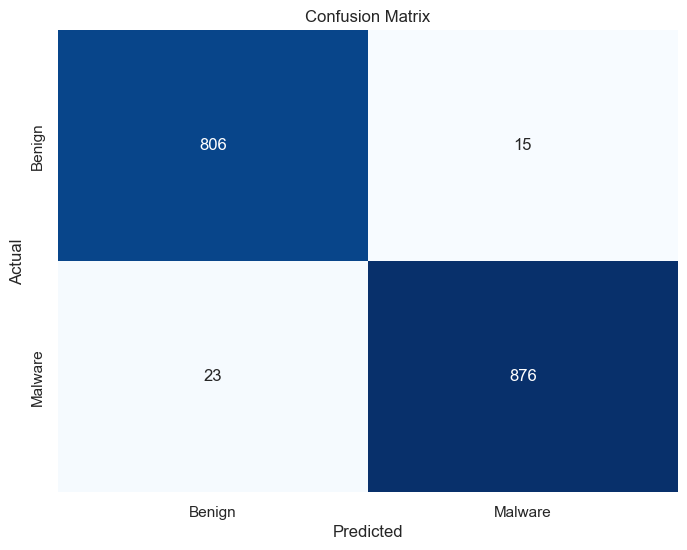

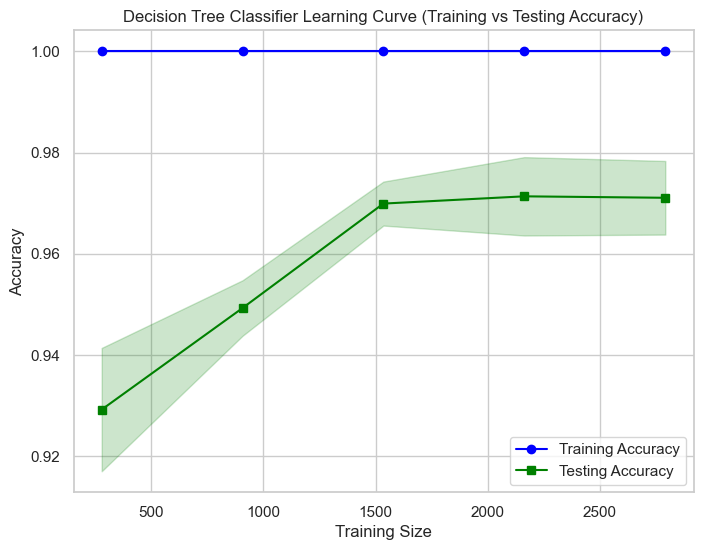

In [132]:
## Decision Tree Classifier (DT)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

dt_clf = DecisionTreeClassifier(random_state=100)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# Calculate various metrics
roc_auc = roc_auc_score(y_test, dt_pred)
accuracy = accuracy_score(y_test, dt_pred)
classification_rep = classification_report(y_test, dt_pred)
conf_matrix = confusion_matrix(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)

# Print the results in the desired format
print("Decision Tree Classifier Results")
print("="*40)
print(f"1. ROC AUC Score: {roc_auc:.3f}")
print(f"2. Accuracy: {accuracy:.3f}")
print(f"3. Classification Report -\n{classification_rep}")
print(f"4. Confusion Matrix - \n{conf_matrix}")
print(f"5. F1 Score: {f1:.3f}")
print("="*40)

# Plot Confusion Matrix (Optional)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False, 
            xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plotting the Learning Curve (Training vs Testing accuracy)
train_sizes, train_scores, test_scores = learning_curve(dt_clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color='blue', marker='o')
plt.plot(train_sizes, test_mean, label="Testing Accuracy", color='green', marker='s')
plt.fill_between(train_sizes, train_mean - np.std(train_scores, axis=1),
                 train_mean + np.std(train_scores, axis=1), color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - np.std(test_scores, axis=1),
                 test_mean + np.std(test_scores, axis=1), color='green', alpha=0.2)
plt.title("Decision Tree Classifier Learning Curve (Training vs Testing Accuracy)")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Linear Discriminant Analysis (LDA) Results
1. ROC AUC Score: 0.513
2. Accuracy: 0.535
3. Classification Report -
              precision    recall  f1-score   support

           0       0.84      0.03      0.06       821
           1       0.53      0.99      0.69       899

    accuracy                           0.53      1720
   macro avg       0.68      0.51      0.38      1720
weighted avg       0.68      0.53      0.39      1720

4. Confusion Matrix - 
[[ 26 795]
 [  5 894]]
5. F1 Score: 0.691


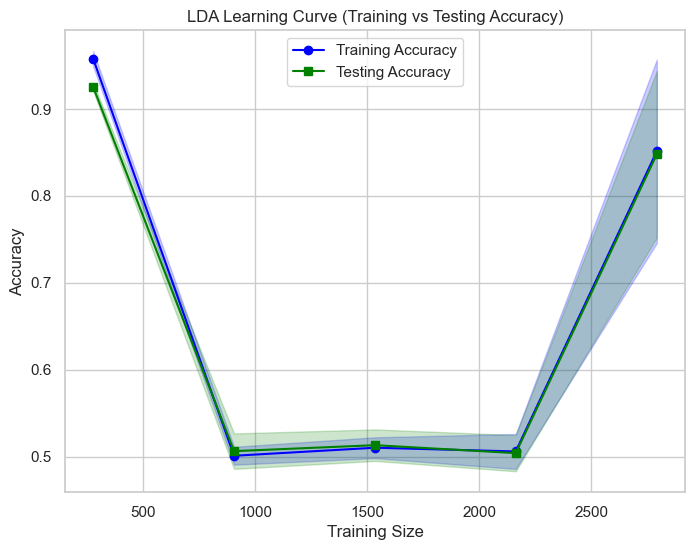

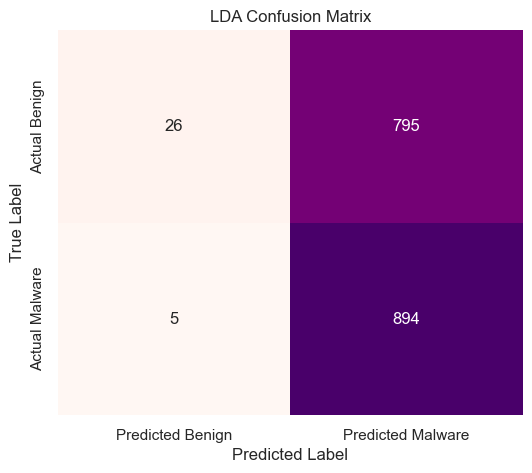

In [138]:
## Linear Discriminant Analysis (LDA)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, f1_score

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
lda_pred = lda_clf.predict(X_test)

# Calculate various metrics
roc_auc = roc_auc_score(y_test, lda_pred)
accuracy = accuracy_score(y_test, lda_pred)
classification_rep = classification_report(y_test, lda_pred)
conf_matrix = confusion_matrix(y_test, lda_pred)
f1 = f1_score(y_test, lda_pred)

# Print the results in the desired format
print("Linear Discriminant Analysis (LDA) Results")
print("="*40)
print(f"1. ROC AUC Score: {roc_auc:.3f}")
print(f"2. Accuracy: {accuracy:.3f}")
print(f"3. Classification Report -\n{classification_rep}")
print(f"4. Confusion Matrix - \n{conf_matrix}")
print(f"5. F1 Score: {f1:.3f}")
print("="*40)

# Plotting the Learning Curve (Training vs Testing accuracy)
train_sizes, train_scores, test_scores = learning_curve(lda_clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color='blue', marker='o')
plt.plot(train_sizes, test_mean, label="Testing Accuracy", color='green', marker='s')
plt.fill_between(train_sizes, train_mean - np.std(train_scores, axis=1),
                 train_mean + np.std(train_scores, axis=1), color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - np.std(test_scores, axis=1),
                 test_mean + np.std(test_scores, axis=1), color='green', alpha=0.2)
plt.title("LDA Learning Curve (Training vs Testing Accuracy)")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# Plotting the Confusion Matrix with Custom Colors (Crimson, Baby Pink, Red Pink)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='RdPu', cbar=False, 
            xticklabels=['Predicted Benign', 'Predicted Malware'], 
            yticklabels=['Actual Benign', 'Actual Malware'])
plt.title('LDA Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [51]:
#### DEEP LEARNING  MODEL ###

Multi-Layer Perceptron (MLP) Results
1. ROC AUC Score: 0.978
2. Accuracy: 0.978
3. Classification Report -
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       821
           1       0.97      0.99      0.98       899

    accuracy                           0.98      1720
   macro avg       0.98      0.98      0.98      1720
weighted avg       0.98      0.98      0.98      1720

4. Confusion Matrix - 
[[796  25]
 [ 12 887]]
5. F1 Score: 0.980


C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\neural_netw

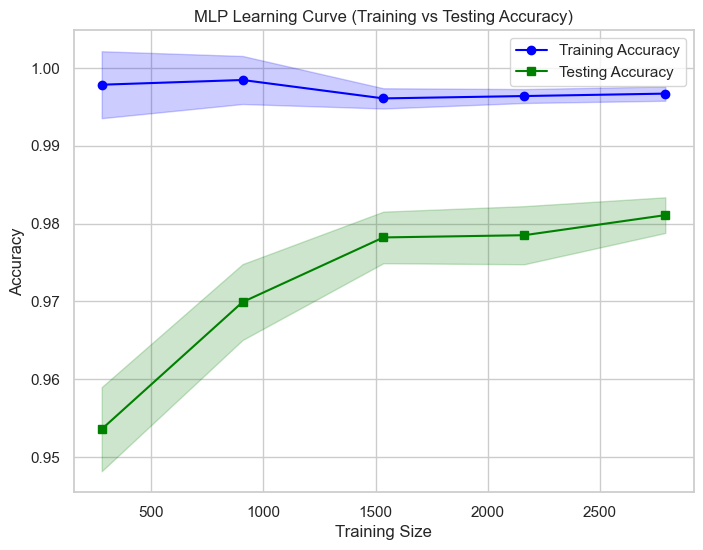

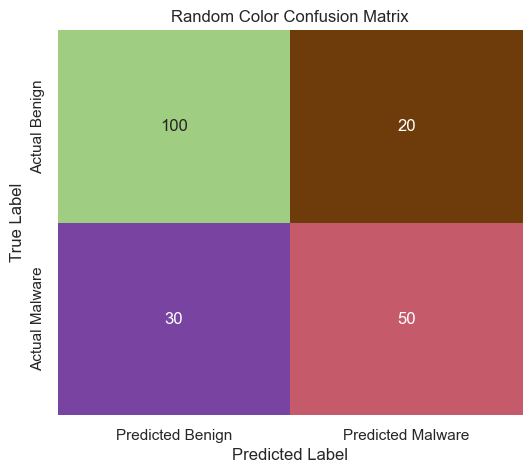

In [140]:
## Multi-Layer Perceptron (MLP)


from sklearn.neural_network import MLPClassifier
# Initialize the MLP classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, solver='adam', random_state=42)

# Fit the model
mlp_clf.fit(X_train, y_train)

# Make predictions
mlp_pred = mlp_clf.predict(X_test)
mlp_pred_proba = mlp_clf.predict_proba(X_test)

# Calculate various metrics
roc_auc = roc_auc_score(y_test, mlp_pred)
accuracy = accuracy_score(y_test, mlp_pred)
classification_rep = classification_report(y_test, mlp_pred)
conf_matrix = confusion_matrix(y_test, mlp_pred)
f1 = f1_score(y_test, mlp_pred)

# Print the results in a similar format as KNN output
print("Multi-Layer Perceptron (MLP) Results")
print("="*40)
print(f"1. ROC AUC Score: {roc_auc:.3f}")
print(f"2. Accuracy: {accuracy:.3f}")
print(f"3. Classification Report -\n{classification_rep}")
print(f"4. Confusion Matrix - \n{conf_matrix}")
print(f"5. F1 Score: {f1:.3f}")
print("="*40)

# Plotting the Learning Curve (Training vs Testing accuracy)
train_sizes, train_scores, test_scores = learning_curve(mlp_clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color='blue', marker='o')
plt.plot(train_sizes, test_mean, label="Testing Accuracy", color='green', marker='s')
plt.fill_between(train_sizes, train_mean - np.std(train_scores, axis=1),
                 train_mean + np.std(train_scores, axis=1), color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - np.std(test_scores, axis=1),
                 test_mean + np.std(test_scores, axis=1), color='green', alpha=0.2)
plt.title("MLP Learning Curve (Training vs Testing Accuracy)")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()



# Generate a random RGB color
def random_color():
    return [random.random(), random.random(), random.random()]

# Generate random colors for the confusion matrix
random_cmap = plt.cm.colors.ListedColormap([random_color() for _ in range(10)])

# Example confusion matrix
conf_matrix = np.array([[100, 20], [30, 50]])

# Plotting the Confusion Matrix with Random Colors
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap=random_cmap, cbar=False, 
            xticklabels=['Predicted Benign', 'Predicted Malware'], 
            yticklabels=['Actual Benign', 'Actual Malware'])
plt.title('Random Color Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [142]:
!pip install tensorflow

C:\Users\O M A R\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8629 - loss: 0.3434 - val_accuracy: 0.9407 - val_loss: 0.2305
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9504 - loss: 0.1342 - val_accuracy: 0.9517 - val_loss: 0.2419
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9579 - loss: 0.1068 - val_accuracy: 0.9570 - val_loss: 0.2512
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9676 - loss: 0.0982 - val_accuracy: 0.9628 - val_loss: 0.2654
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9700 - loss: 0.0871 - val_accuracy: 0.9663 - val_loss: 0.2784
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9677 - loss: 0.0807 - val_accuracy: 0.9663 - val_loss: 0.2776
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9740 - loss: 0.0689 - val_accuracy: 0.9715 - val_loss: 0.2955
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9738 - loss: 0.0719 - val_accuracy: 0.

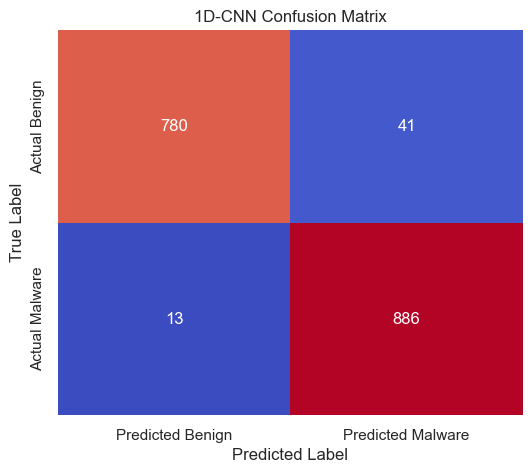

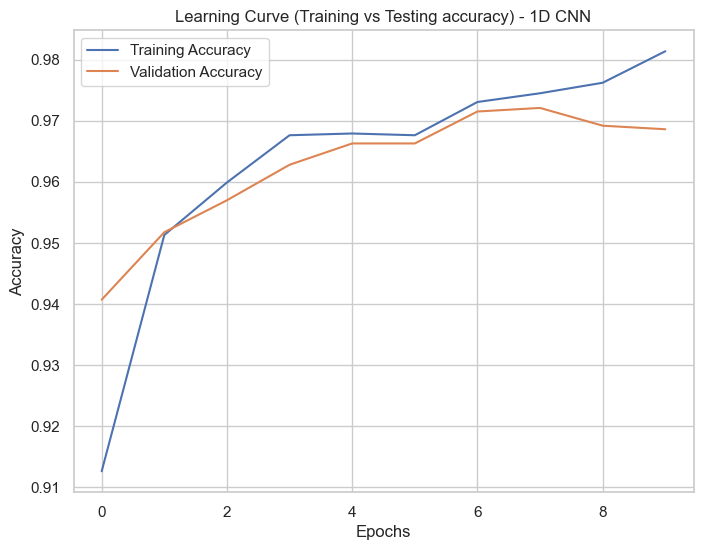

In [144]:
## 1-Dimensional Convolutional Neural Network (1D-CNN)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Reshape the data to fit the 1D-CNN model (1D-CNN expects data with shape (samples, timesteps, features))
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the 1D-CNN model
cnn_model = Sequential()

# Add a 1D convolutional layer
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten the output
cnn_model.add(Flatten())

# Add a fully connected layer
cnn_model.add(Dense(units=64, activation='relu'))

# Output layer
cnn_model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Make predictions
cnn_pred = cnn_model.predict(X_test_cnn)

# Calculate metrics
roc_auc = roc_auc_score(y_test, cnn_pred)
accuracy = accuracy_score(y_test, cnn_pred.round())  # Round predictions to 0 or 1
classification_rep = classification_report(y_test, cnn_pred.round())
conf_matrix = confusion_matrix(y_test, cnn_pred.round())
f1 = f1_score(y_test, cnn_pred.round())

# Print the results
print("1-Dimensional Convolutional Neural Network (1D-CNN) Results")
print("="*40)
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy of 1D-CNN:', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)
print("="*40)

# Plotting the Confusion Matrix with Custom Colors
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='coolwarm', cbar=False, 
            xticklabels=['Predicted Benign', 'Predicted Malware'], 
            yticklabels=['Actual Benign', 'Actual Malware'])
plt.title('1D-CNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting the Learning Curve (Training vs Testing accuracy)
plt.figure(figsize=(8, 6))
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve (Training vs Testing accuracy) - 1D CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [146]:
pip install pandas numpy tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


Epoch 1/10


C:\Users\O M A R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7794 - loss: 0.5103 - val_accuracy: 0.8686 - val_loss: 0.3209
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8858 - loss: 0.2887 - val_accuracy: 0.9012 - val_loss: 0.2559
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9038 - loss: 0.2640 - val_accuracy: 0.9349 - val_loss: 0.2138
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9275 - loss: 0.1914 - val_accuracy: 0.9360 - val_loss: 0.1939
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9306 - loss: 0.1915 - val_accuracy: 0.9395 - val_loss: 0.1707
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9511 - loss: 0.1385 - val_accuracy: 0.9605 - val_loss: 0.1451
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9627 - loss: 0.1120 - val_accuracy: 0.9238 - val_loss: 0.1762
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9506 - loss: 0.1193 - val_accuracy: 0.9430 - val

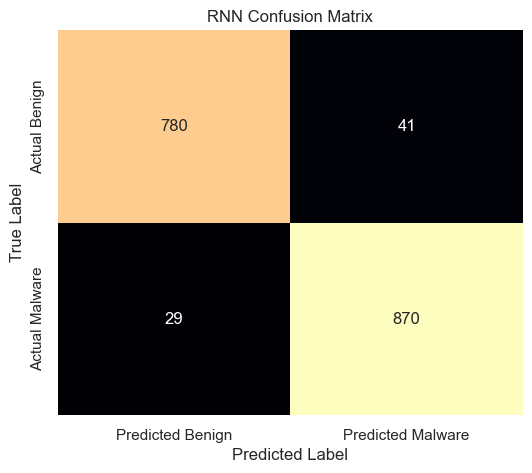

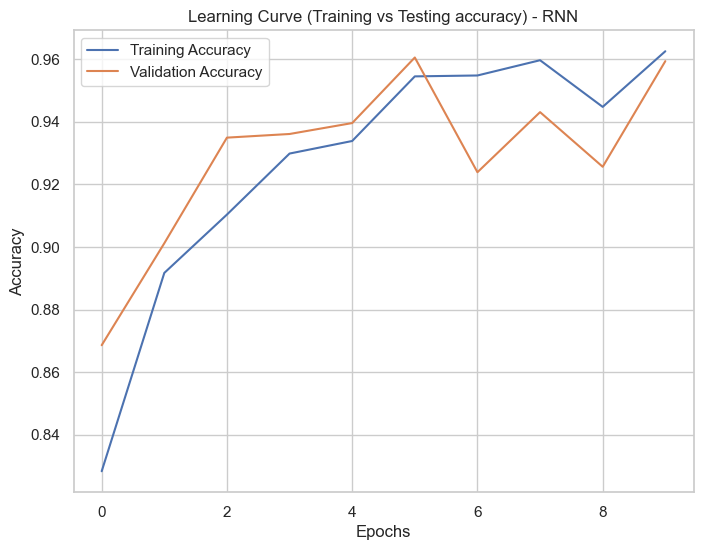

In [148]:
## Recurrent Neural Network (RNN)

from tensorflow.keras.layers import SimpleRNN, Dense

# Reshape the data to fit the RNN model (RNN expects data with shape (samples, timesteps, features))
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model
rnn_model = Sequential()

# Add an RNN layer
rnn_model.add(SimpleRNN(units=64, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))

# Add a fully connected layer
rnn_model.add(Dense(units=64, activation='relu'))

# Output layer
rnn_model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compile the model
rnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Make predictions
rnn_pred = rnn_model.predict(X_test_rnn)

# Calculate metrics
roc_auc = roc_auc_score(y_test, rnn_pred)
accuracy = accuracy_score(y_test, rnn_pred.round())  # Round predictions to 0 or 1
classification_rep = classification_report(y_test, rnn_pred.round())
conf_matrix = confusion_matrix(y_test, rnn_pred.round())
f1 = f1_score(y_test, rnn_pred.round())

# Print the results

print("Recurrent Neural Network (RNN) Results")
print("="*40)
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy of RNN:', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)
print("="*40)

# Plotting the Confusion Matrix with Custom Colors
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='magma', cbar=False, 
            xticklabels=['Predicted Benign', 'Predicted Malware'], 
            yticklabels=['Actual Benign', 'Actual Malware'])
plt.title('RNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting the Learning Curve (Training vs Testing accuracy)
plt.figure(figsize=(8, 6))
plt.plot(rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve (Training vs Testing accuracy) - RNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/10


C:\Users\O M A R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6103 - loss: 0.6904 - val_accuracy: 0.7227 - val_loss: 0.6448
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7078 - loss: 0.6408 - val_accuracy: 0.7203 - val_loss: 0.6174
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7149 - loss: 0.6080 - val_accuracy: 0.7477 - val_loss: 0.5267
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7656 - loss: 0.5081 - val_accuracy: 0.7802 - val_loss: 0.4205
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7960 - loss: 0.4175 - val_accuracy: 0.8041 - val_loss: 0.4168
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8117 - loss: 0.3840 - val_accuracy: 0.8047 - val_loss: 0.4047
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8211 - loss: 0.3930 - val_accuracy: 0.8110 - val_loss: 0.3672
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8620 - loss: 0.3332 - val_accuracy: 0.866

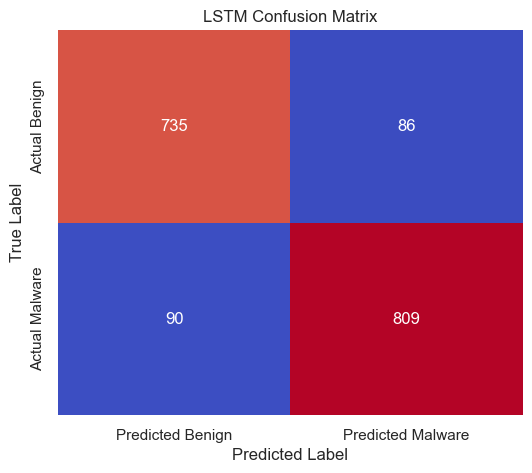

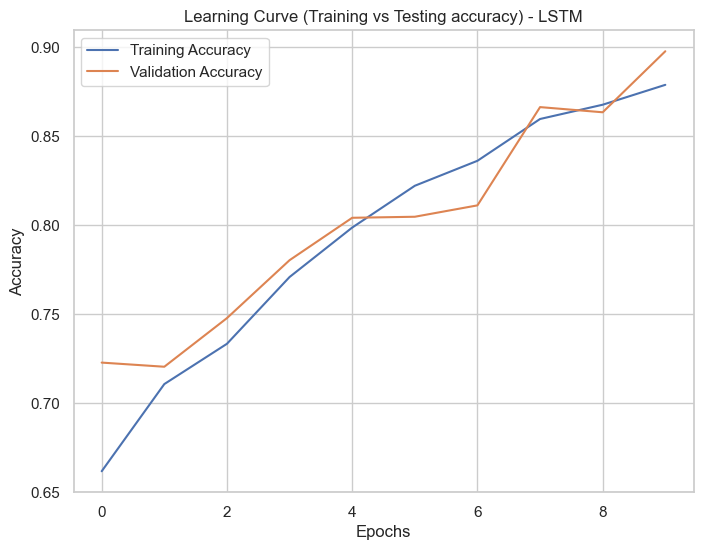

In [150]:
## LSTM (Long Short-Term Memory) model

# Import necessary libraries

from tensorflow.keras.layers import LSTM, Dense

# Reshape the data to fit the LSTM model (LSTM expects data with shape (samples, timesteps, features))
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
lstm_model = Sequential()

# Add an LSTM layer
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))

# Add a fully connected layer
lstm_model.add(Dense(units=64, activation='relu'))

# Output layer
lstm_model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compile the model
lstm_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

# Make predictions
lstm_pred = lstm_model.predict(X_test_lstm)

# Calculate metrics
roc_auc = roc_auc_score(y_test, lstm_pred)
accuracy = accuracy_score(y_test, lstm_pred.round())  # Round predictions to 0 or 1
classification_rep = classification_report(y_test, lstm_pred.round())
conf_matrix = confusion_matrix(y_test, lstm_pred.round())
f1 = f1_score(y_test, lstm_pred.round())

# Print the results

print("Long Short-Term Memory (LSTM) Results")
print("="*40)
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy of LSTM:', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)
print("="*40)

# Plotting the Confusion Matrix with Custom Colors (Crimson, Baby Pink, Red Pink)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='coolwarm', cbar=False, 
            xticklabels=['Predicted Benign', 'Predicted Malware'], 
            yticklabels=['Actual Benign', 'Actual Malware'])
plt.title('LSTM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting the Learning Curve (Training vs Testing accuracy)
plt.figure(figsize=(8, 6))
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve (Training vs Testing accuracy) - LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/10


C:\Users\O M A R\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6284 - loss: 0.6760 - val_accuracy: 0.7506 - val_loss: 0.5891
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7547 - loss: 0.5792 - val_accuracy: 0.7506 - val_loss: 0.5669
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7565 - loss: 0.5595 - val_accuracy: 0.7506 - val_loss: 0.5528
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7645 - loss: 0.5357 - val_accuracy: 0.7494 - val_loss: 0.5394
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7466 - loss: 0.5375 - val_accuracy: 0.7471 - val_loss: 0.5260
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7526 - loss: 0.5132 - val_accuracy: 0.7390 - val_loss: 0.5074
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7339 - loss: 0.5198 - val_accuracy: 0.7302 - val_loss: 0.4974
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7648 - loss: 0.4889 - val_accuracy: 0.757

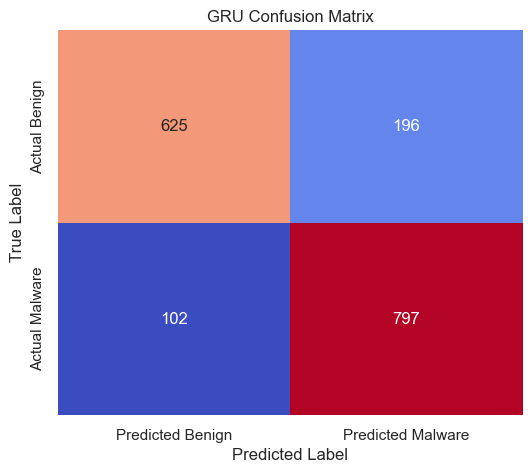

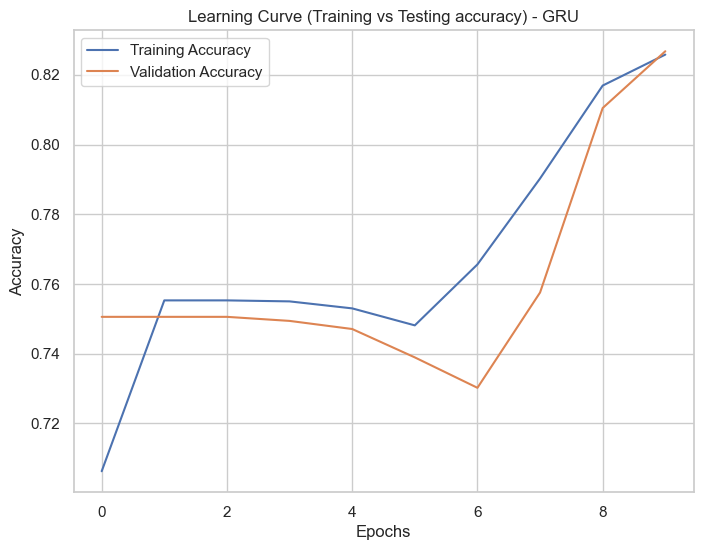

In [152]:
## GRU (Gated Recurrent Unit)

# Import necessary libraries
from tensorflow.keras.layers import GRU, Dense

# Reshape the data for GRU model (GRU expects 3D input like LSTM)
X_train_gru = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_gru = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the GRU model
gru_model = Sequential()

# Add GRU layer
gru_model.add(GRU(units=50, activation='relu', input_shape=(X_train_gru.shape[1], 1)))

# Fully connected layer
gru_model.add(Dense(units=64, activation='relu'))

# Output layer (binary classification)
gru_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
gru_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
gru_history = gru_model.fit(X_train_gru, y_train, epochs=10, batch_size=32, validation_data=(X_test_gru, y_test))

# Make predictions
gru_pred = gru_model.predict(X_test_gru)

# Calculate metrics
roc_auc = roc_auc_score(y_test, gru_pred)
accuracy = accuracy_score(y_test, gru_pred.round())  # Round predictions to 0 or 1
classification_rep = classification_report(y_test, gru_pred.round())
conf_matrix = confusion_matrix(y_test, gru_pred.round())
f1 = f1_score(y_test, gru_pred.round())

# Print the results
print("Gated Recurrent Unit (GRU) Results")
print("="*40)
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy of GRU:', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)
print("="*40)

# Plotting the Confusion Matrix with Custom Colors (Crimson, Baby Pink, Red Pink)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='coolwarm', cbar=False, 
            xticklabels=['Predicted Benign', 'Predicted Malware'], 
            yticklabels=['Actual Benign', 'Actual Malware'])
plt.title('GRU Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting the Learning Curve (Training vs Testing accuracy)
plt.figure(figsize=(8, 6))
plt.plot(gru_history.history['accuracy'], label='Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve (Training vs Testing accuracy) - GRU')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [49]:
!pip install prettytable


Comparison of Model Performance:

+---------------------+---------+----------+----------+
|        Model        | ROC AUC | Accuracy | F1 Score |
+---------------------+---------+----------+----------+
|         KNN         |  0.533  |  0.533   |  0.533   |
|    Random Forest    |  0.993  |  0.993   |  0.993   |
|     Naive Bayes     |  0.712  |  0.699   |  0.607   |
|       AdaBoost      |  0.981  |  0.981   |  0.982   |
| Logistic Regression |  0.954  |  0.955   |  0.957   |
|    Decision Tree    |  0.978  |  0.978   |  0.979   |
|         LDA         |  0.513  |  0.535   |  0.691   |
+---------------------+---------+----------+----------+


<Figure size 1200x600 with 0 Axes>

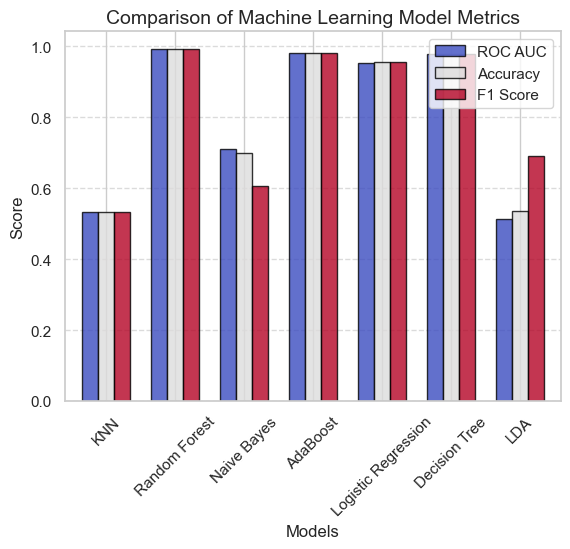

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Define the model results
models = {
    "KNN": {"ROC AUC": 0.533, "Accuracy": 0.533, "F1 Score": 0.533},
    "Random Forest": {"ROC AUC": 0.993, "Accuracy": 0.993, "F1 Score": 0.993},
    "Naive Bayes": {"ROC AUC": 0.712, "Accuracy": 0.699, "F1 Score": 0.607},
    "AdaBoost": {"ROC AUC": 0.981, "Accuracy": 0.981, "F1 Score": 0.982},
    "Logistic Regression": {"ROC AUC": 0.954, "Accuracy": 0.955, "F1 Score": 0.957},
    "Decision Tree": {"ROC AUC": 0.978, "Accuracy": 0.978, "F1 Score": 0.979},
    "LDA": {"ROC AUC": 0.513, "Accuracy": 0.535, "F1 Score": 0.691}
}

# Convert to DataFrame for visualization
df = pd.DataFrame(models).T  # Transpose for easier reading

# Display a beautifully formatted table using PrettyTable
table = PrettyTable()
table.field_names = ["Model", "ROC AUC", "Accuracy", "F1 Score"]
for model, values in models.items():
    table.add_row([model, values["ROC AUC"], values["Accuracy"], values["F1 Score"]])

print("\nComparison of Model Performance:\n")
print(table)

# Create a bar chart for visualizing the metrics
plt.figure(figsize=(12, 6))
df.plot(kind='bar', alpha=0.8, width=0.7, cmap="coolwarm", edgecolor="black")

# Customizing the visualization
plt.title("Comparison of Machine Learning Model Metrics", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=11)  # Rotate labels for readability
plt.grid(axis='y', linestyle="--", alpha=0.7)  # Improve grid visibility
plt.show()


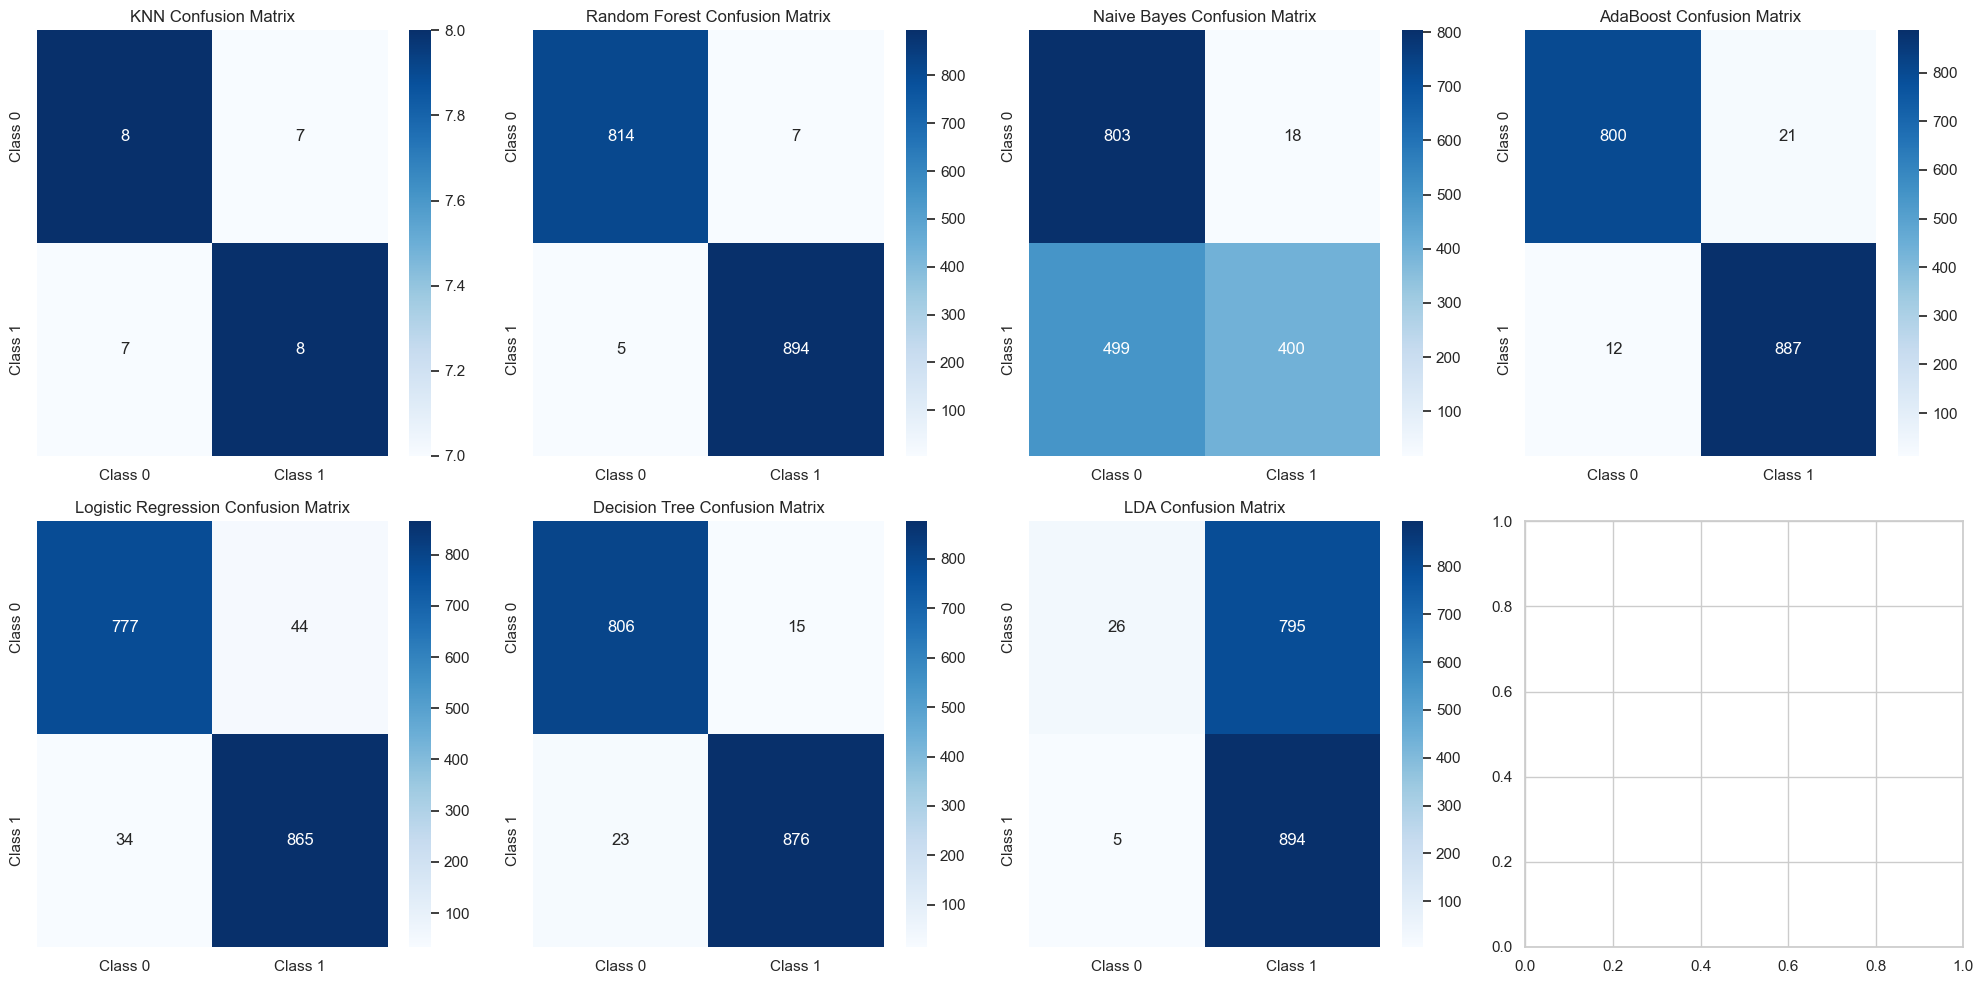

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define confusion matrices for different models
conf_matrices = {
    "KNN": np.array([[8, 7], [7, 8]]),
    "Random Forest": np.array([[814, 7], [5, 894]]),
    "Naive Bayes": np.array([[803, 18], [499, 400]]),
    "AdaBoost": np.array([[800, 21], [12, 887]]),
    "Logistic Regression": np.array([[777, 44], [34, 865]]),
    "Decision Tree": np.array([[806, 15], [23, 876]]),
    "LDA": np.array([[26, 795], [5, 894]])
}

# Create subplots to visualize confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # Adjust grid size as needed
axes = axes.flatten()  # Flatten to iterate easily

for i, (model, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], 
                yticklabels=["Class 0", "Class 1"], ax=axes[i])
    axes[i].set_title(f"{model} Confusion Matrix")

# Adjust layout
plt.tight_layout()
plt.show()



Comparison of Deep Learning Model Performance:

+--------+---------+----------+----------+
| Model  | ROC AUC | Accuracy | F1 Score |
+--------+---------+----------+----------+
|  MLP   |  0.978  |  0.978   |   0.98   |
| 1D-CNN |  0.992  |  0.969   |   0.97   |
|  RNN   |   0.99  |  0.959   |  0.961   |
|  LSTM  |   0.95  |  0.898   |  0.902   |
|  GRU   |  0.854  |  0.827   |  0.842   |
+--------+---------+----------+----------+


<Figure size 1200x600 with 0 Axes>

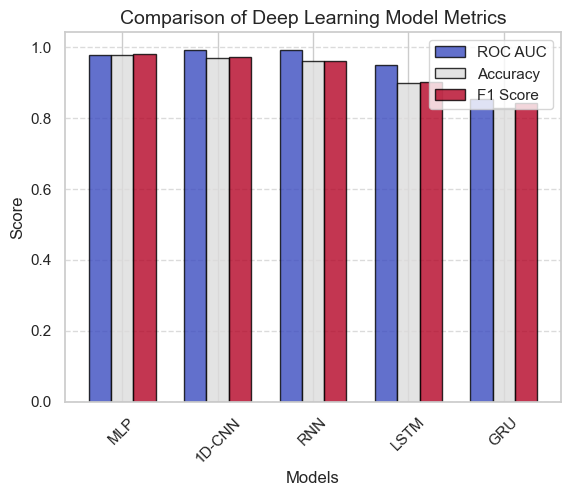

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Define the deep learning model results
models = {
    "MLP": {"ROC AUC": 0.978, "Accuracy": 0.978, "F1 Score": 0.980},
    "1D-CNN": {"ROC AUC": 0.992, "Accuracy": 0.969, "F1 Score": 0.970},
    "RNN": {"ROC AUC": 0.990, "Accuracy": 0.959, "F1 Score": 0.961},
    "LSTM": {"ROC AUC": 0.950, "Accuracy": 0.898, "F1 Score": 0.902},
    "GRU": {"ROC AUC": 0.854, "Accuracy": 0.827, "F1 Score": 0.842}
}

# Convert to DataFrame for visualization
df = pd.DataFrame(models).T  # Transpose for easier reading

# Display a beautifully formatted table using PrettyTable
table = PrettyTable()
table.field_names = ["Model", "ROC AUC", "Accuracy", "F1 Score"]
for model, values in models.items():
    table.add_row([model, values["ROC AUC"], values["Accuracy"], values["F1 Score"]])

print("\nComparison of Deep Learning Model Performance:\n")
print(table)

# Create a bar chart for visualizing the metrics
plt.figure(figsize=(12, 6))
df.plot(kind='bar', alpha=0.8, width=0.7, cmap="coolwarm", edgecolor="black")

# Customizing the visualization
plt.title("Comparison of Deep Learning Model Metrics", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.legend(loc="best")
plt.xticks(rotation=45, fontsize=11)  # Rotate labels for readability
plt.grid(axis='y', linestyle="--", alpha=0.7)  # Improve grid visibility
plt.show()


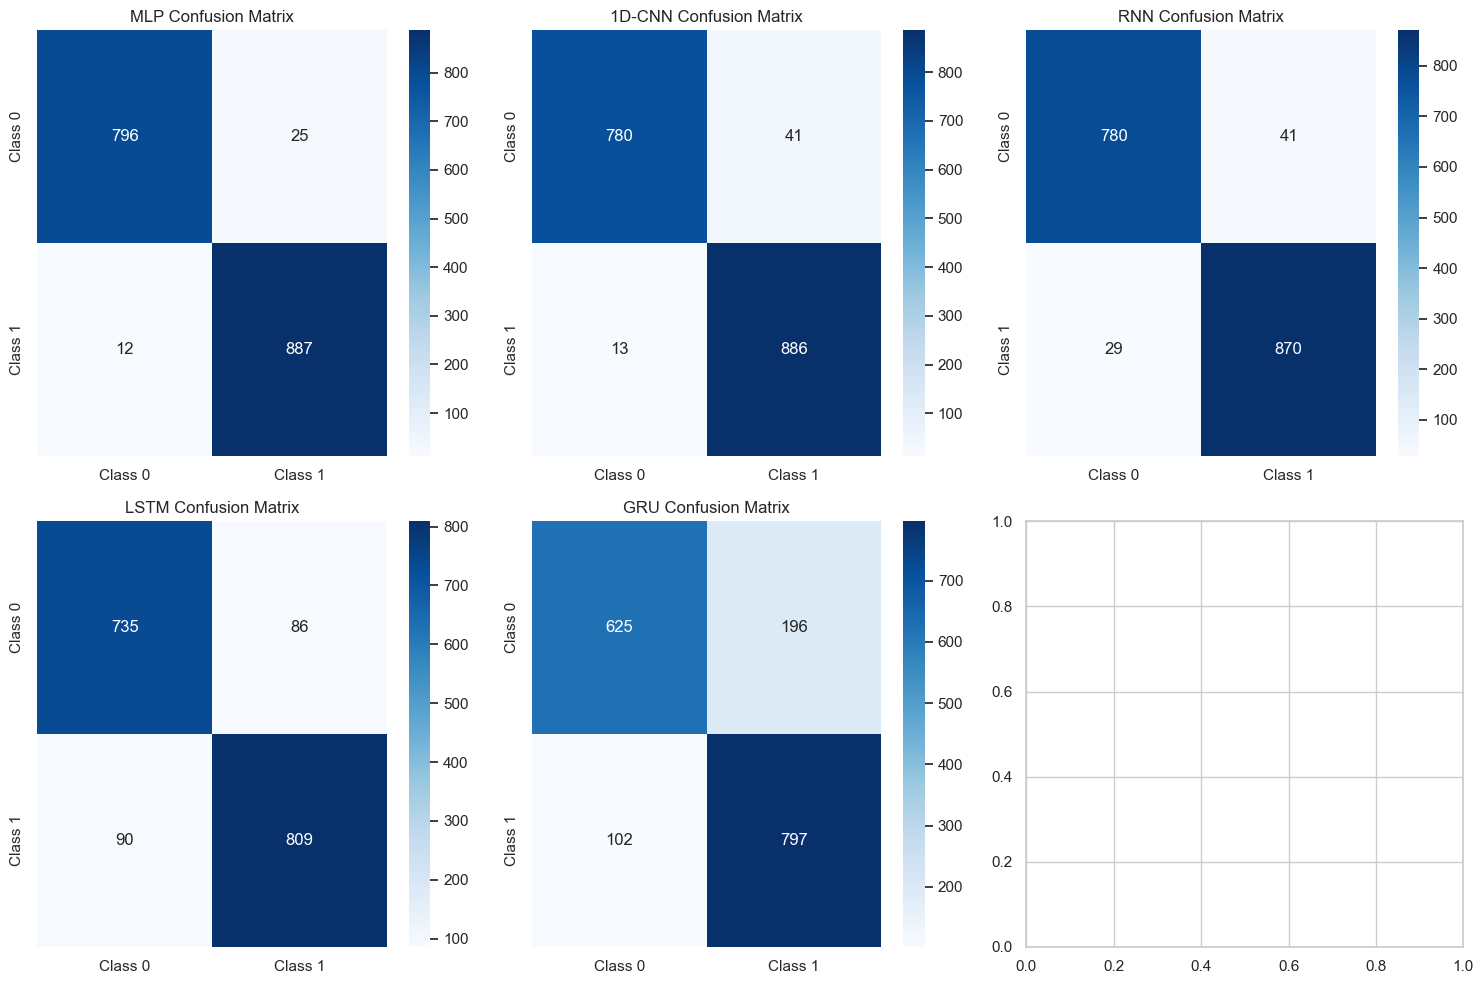

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define confusion matrices for deep learning models
conf_matrices = {
    "MLP": np.array([[796, 25], [12, 887]]),
    "1D-CNN": np.array([[780, 41], [13, 886]]),
    "RNN": np.array([[780, 41], [29, 870]]),
    "LSTM": np.array([[735, 86], [90, 809]]),
    "GRU": np.array([[625, 196], [102, 797]])
}

# Dynamically determine grid size based on number of models
num_models = len(conf_matrices)
rows = num_models // 3 + (num_models % 3 > 0)  # Ensure proper row distribution
cols = 3  # Keep 3 columns for clarity

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 5))
axes = axes.flatten()[:num_models]  # Ensure only needed axes are used

# Plot confusion matrices
for i, (model, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], 
                yticklabels=["Class 0", "Class 1"], ax=axes[i])
    axes[i].set_title(f"{model} Confusion Matrix")

# Remove unused subplots
for j in range(num_models, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



=== Comparison of Machine Learning & Deep Learning Models ===

+---------------------+---------+----------+----------+
|        Model        | ROC AUC | Accuracy | F1 Score |
+---------------------+---------+----------+----------+
|         KNN         |  0.533  |  0.533   |  0.533   |
|    Random Forest    |  0.993  |  0.993   |  0.993   |
|     Naive Bayes     |  0.712  |  0.699   |  0.607   |
|       AdaBoost      |  0.981  |  0.981   |  0.982   |
| Logistic Regression |  0.954  |  0.955   |  0.957   |
|    Decision Tree    |  0.978  |  0.978   |  0.979   |
|         LDA         |  0.513  |  0.535   |  0.691   |
|         MLP         |  0.978  |  0.978   |   0.98   |
|        1D-CNN       |  0.992  |  0.969   |   0.97   |
|         RNN         |   0.99  |  0.959   |  0.961   |
|         LSTM        |   0.95  |  0.898   |  0.902   |
|         GRU         |  0.854  |  0.827   |  0.842   |
+---------------------+---------+----------+----------+


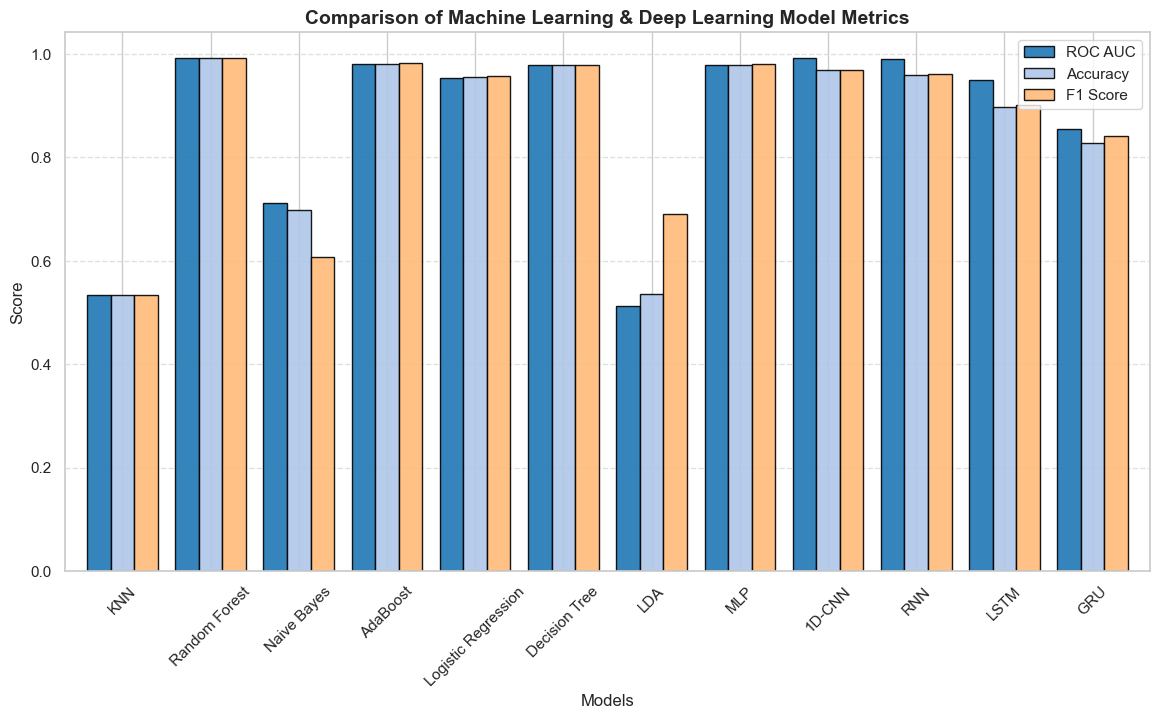

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

# Define results for Machine Learning & Deep Learning models
models = {
    "KNN": {"ROC AUC": 0.533, "Accuracy": 0.533, "F1 Score": 0.533},
    "Random Forest": {"ROC AUC": 0.993, "Accuracy": 0.993, "F1 Score": 0.993},
    "Naive Bayes": {"ROC AUC": 0.712, "Accuracy": 0.699, "F1 Score": 0.607},
    "AdaBoost": {"ROC AUC": 0.981, "Accuracy": 0.981, "F1 Score": 0.982},
    "Logistic Regression": {"ROC AUC": 0.954, "Accuracy": 0.955, "F1 Score": 0.957},
    "Decision Tree": {"ROC AUC": 0.978, "Accuracy": 0.978, "F1 Score": 0.979},
    "LDA": {"ROC AUC": 0.513, "Accuracy": 0.535, "F1 Score": 0.691},
    "MLP": {"ROC AUC": 0.978, "Accuracy": 0.978, "F1 Score": 0.980},
    "1D-CNN": {"ROC AUC": 0.992, "Accuracy": 0.969, "F1 Score": 0.970},
    "RNN": {"ROC AUC": 0.990, "Accuracy": 0.959, "F1 Score": 0.961},
    "LSTM": {"ROC AUC": 0.950, "Accuracy": 0.898, "F1 Score": 0.902},
    "GRU": {"ROC AUC": 0.854, "Accuracy": 0.827, "F1 Score": 0.842}
}

# Convert to DataFrame
df = pd.DataFrame(models).T  # Transpose for better readability

# **Formatted Table Visualization using PrettyTable**
table = PrettyTable()
table.field_names = ["Model", "ROC AUC", "Accuracy", "F1 Score"]
for model, values in models.items():
    table.add_row([model, values["ROC AUC"], values["Accuracy"], values["F1 Score"]])

print("\n=== Comparison of Machine Learning & Deep Learning Models ===\n")
print(table)

# **Bar Chart with Unique Colors per Model**
colors = plt.cm.tab20(np.linspace(0, 1, len(df)))  # Assign different colors to each model

fig, ax = plt.subplots(figsize=(14, 7))
df.plot(kind='bar', width=0.8, alpha=0.9, edgecolor="black", ax=ax, color=colors)

# Styling & Improvements
ax.set_title("Comparison of Machine Learning & Deep Learning Model Metrics", fontsize=14, fontweight="bold")
ax.set_ylabel("Score", fontsize=12)
ax.set_xlabel("Models", fontsize=12)
ax.legend(loc="best", fontsize=11)
plt.xticks(rotation=45, fontsize=11)  
plt.grid(axis='y', linestyle="--", alpha=0.6)  # Improved visibility with dashed grid lines

plt.show()
